In [1]:
#### Configure environment (Colab vs Local)
import os
import sys
#@title Configuration Settings { run: "auto" }
RUNNING_ON_COLAB = False #@param {type:"boolean"}
LOCAL_DATA_DIR = "./data" #@param {type:"string"}
USE_CUSTOM_VXM = True #@param {type:"boolean"}
CUSTOM_VXM_PATH = './data/voxelmorph' #@param {type:"string"}  # Full Colab path

#### Installing neccassary libraries

In [2]:
#### Install necessary libraries
if RUNNING_ON_COLAB:

    # Uninstall original if needed
    !pip uninstall -y voxelmorph

    # Mount Drive first to access custom code
    from google.colab import drive
    drive.mount('/content/drive')
    # Always install neurite
    !pip install git+https://github.com/adalca/neurite.git

    if USE_CUSTOM_VXM:
        # Install custom Voxelmorph
        %cd {CUSTOM_VXM_PATH}

        # Add explicit path
        sys.path.insert(0, CUSTOM_VXM_PATH)
        import voxelmorph as vxm
    else:
        !pip install git+https://github.com/voxelmorph/voxelmorph.git
        import voxelmorph as vxm


else:
    # Install local packages using system Python
    import sys
    import subprocess
    import importlib.util

    # Local setup enhancements
    sys.path.insert(0, os.path.abspath(LOCAL_DATA_DIR))  # Add local data dir to path
    if USE_CUSTOM_VXM:
        from data.voxelmorph import voxelmorph as vxm
    else:
        import voxelmorph as vxm



# Final verification
try:
    os.environ['NEURITE_BACKEND'] = 'tensorflow'  # Add this BEFORE importing neurite/voxelmorph
    import tensorflow, neurite, cv2, skimage, matplotlib, tqdm, scipy
    print("\nVerified package versions:")
    print(f"- TensorFlow {tensorflow.__version__}")
    print(f"- VoxelMorph {vxm.__version__}")
    print(f"- Neurite {neurite.__version__}")
    print(f"- OpenCV {cv2.__version__}")
    print(f"- scikit-image {skimage.__version__}")
    print(f"- Matplotlib {matplotlib.__version__}")
    print(f"- tqdm {tqdm.__version__}")
    print(f"- SciPy {scipy.__version__}")
except ImportError as e:
    print(f"\n❌ Missing package: {str(e)}")
    print("Try installing manually with: pip install", e.name)

d:\study\graduation_project\VXM\neurite\__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()



Verified package versions:
- TensorFlow 2.19.0
- VoxelMorph 0.2
- Neurite 0.2
- OpenCV 4.11.0
- scikit-image 0.25.2
- Matplotlib 3.10.1
- tqdm 4.67.1
- SciPy 1.15.2


#### Verifing Installation and GPU

In [3]:
import os
import sys
import neurite
import tensorflow as tf


# Conditional imports for custom VoxelMorph
if RUNNING_ON_COLAB:
    print("\nUsing custom VoxelMorph from:", CUSTOM_VXM_PATH)
    import importlib
    if not USE_CUSTOM_VXM:
        import voxelmorph as vxm
        importlib.reload(vxm)  # Force reload
        from voxelmorph.tf.networks import VxmDense
else:
    if USE_CUSTOM_VXM:
        from data.voxelmorph import voxelmorph as vxm
        from data.voxelmorph.voxelmorph.tf.networks import VxmDense
    else:
        import voxelmorph as vxm
        from voxelmorph.tf.networks import VxmDense

# Add version verification
try:
    print(f"\nVoxelMorph version: {vxm.__version__}")
    print("Loaded from:", os.path.dirname(vxm.__file__))
except AttributeError:
    print("\n⚠️ Using custom VoxelMorph without version tag")

# Rest of your existing imports and checks...
# Verification
print("\n--- Environment Summary ---")
print(f"Running on: {'Colab' if RUNNING_ON_COLAB else 'Local'}")
print(f"Python path: {sys.path}")
print(f"\nPython: {sys.version}")

print(f"TensorFlow: {tf.__version__}")
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

print(f"Neurite backend: {neurite.backend}")
print(f"VoxelMorph path: {os.path.dirname(vxm.__file__)}")
print(f"VoxelMorph version: {vxm.__version__ if hasattr(vxm, '__version__') else 'custom'}")



VoxelMorph version: 0.2
Loaded from: d:\study\graduation_project\VXM\data\voxelmorph\voxelmorph

--- Environment Summary ---
Running on: Local
Python path: ['d:\\study\\graduation_project\\VXM\\data', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages']

Python: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.

#### Configure data paths based on environment

In [4]:
if RUNNING_ON_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_DATA_PATH = '/content/drive/My Drive/GP_Data_Folder/GP_Data-Sets'
    MODELS_BASE_PATH = '/content/drive/My Drive/GP_Data_Folder/Models'

    # Colab-specific path structure
    ACDC_BASE = os.path.join('ACDC', 'database')
    SUNNYBROOK_BASE = 'SunnyBrook'
    train_data = '/content/drive/My Drive/GP_Data_Folder/data/train'
    val_data = '/content/drive/My Drive/GP_Data_Folder/data/val'
    test_data = '/content/drive/My Drive/GP_Data_Folder/data/test'
    mask_data = '/content/drive/My Drive/GP_Data_Folder/data/ACDC-Masks-1'
    MODEL_TESTING_PATH = '/content/drive/My Drive/GP_Data_Folder/data/model_testing'

    train_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_train'
    val_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_val'
    test_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_test'
    mask_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_masks'
    displacement_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_displacements'
else:
    BASE_DATA_PATH = LOCAL_DATA_DIR
    MODELS_BASE_PATH = os.path.join(LOCAL_DATA_DIR, 'Models')

    # Local-specific path structure
    ACDC_BASE = ''
    SUNNYBROOK_BASE = ''
    train_data = os.path.join(LOCAL_DATA_DIR, 'train')
    val_data = os.path.join(LOCAL_DATA_DIR, 'val')
    test_data = os.path.join(LOCAL_DATA_DIR, 'test')
    mask_data = os.path.join(LOCAL_DATA_DIR, 'ACDC-Masks-1')
    MODEL_TESTING_PATH = os.path.join(LOCAL_DATA_DIR, 'model_testing')

    train_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_train')
    val_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_val')
    test_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_test')
    mask_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_masks')
    displacement_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_displacements')

    unsupervised_data = os.path.join(LOCAL_DATA_DIR, 'Training_data')

# Simulated data paths (already updated in your script)
SIMULATED_DATA_PATH = test_simulated_data  # ./data/Simulated_test
SIMULATED_MASK_PATH = mask_simulated_data  # ./data/Simulated_masks
SIMULATED_DISP_PATH = displacement_simulated_data  # ./data/Simulated_displacements

In [5]:
def check_paths(paths):
    """Verify existence of required paths with enhanced feedback"""
    missing_paths = []
    existing_paths = []

    print("\nChecking data paths:")
    for name, path in paths.items():
        exists = os.path.exists(path)
        status = "✓" if exists else "✗"
        print(f"  {status} {name}: {path}")

        if exists:
            existing_paths.append(path)
        else:
            missing_paths.append(path)

    return existing_paths, missing_paths

# Check all critical paths
paths_to_check = {
    'Simulated Training': train_simulated_data,
    'Simulated Validation': val_simulated_data,
    'Simulated Testing': test_simulated_data,
    'Simulated Masks': mask_simulated_data,
    'Simulated Displacements': displacement_simulated_data,
    'train data': train_data,
    'val data': val_data,
    'test data': test_data,
    'mask data': mask_data, 
}

existing, missing = check_paths(paths_to_check)

if missing:
    print("\n⚠️ Missing paths detected!")
    if RUNNING_ON_COLAB:
        print("Ensure Google Drive is mounted correctly and data is in the expected locations.")
    else:
        print(f"Please ensure your local data directory ({LOCAL_DATA_DIR}) contains:")
        print("- Simulated Training/Validation/Testing folders")
        print("- Simulated Masks folder")
        print("- Simulated Displacements folder")
        print("- ACDC-Masks-1 folder")
        print("- model_testing")
        print("- train/val/test folders")
        raise FileNotFoundError("Missing required data paths")  # Uncomment to enforce strict checking


Checking data paths:
  ✓ Simulated Training: ./data\Simulated_train
  ✓ Simulated Validation: ./data\Simulated_val
  ✓ Simulated Testing: ./data\Simulated_test
  ✓ Simulated Masks: ./data\Simulated_masks
  ✓ Simulated Displacements: ./data\Simulated_displacements
  ✓ train data: ./data\train
  ✓ val data: ./data\val
  ✓ test data: ./data\test
  ✓ mask data: ./data\ACDC-Masks-1


#### Configure Models paths based on environment

In [6]:
#### Model configuration
MODEL_CONFIG = {
    # 1. No Mask (Baseline)
    # 'no_mask': {
    #     'name': 'voxelmorph_no_mask',
    #     'use_mask': False,
    #     'use_mse_mask': False,
    #     'use_smoothness_mask': False
    # },
    # 2. New MSE Mask only
    'mse_mask': {
        'name': 'voxelmorph_mse_mask',
        'use_mask': True,
        'use_mse_mask': True,
        'use_smoothness_mask': False
    },
    # # 3. New Smoothness Mask only
    # 'smoothness_mask': {
    #     'name': 'voxelmorph_smoothness_mask',
    #     'use_mask': True,
    #     'use_mse_mask': False,
    #     'use_smoothness_mask': True
    # },
    # # 4. Both Masks
    # 'both_masks': {
    #     'name': 'voxelmorph_both_masks',
    #     'use_mask': True,
    #     'use_mse_mask': True,
    #     'use_smoothness_mask': True
    # }
}

# Lambda values to test (0.1 to 1.0)
# LAMBDAS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# LAMBDAS = [0.016, 0.033, 0.066, 0.1]
LAMBDAS = [0.1]

# kernel configrations
KERNEL_CONFIGS = {
    'default': {
        'encoder': [[3], [3], [3], [3]],
        'decoder': [[3], [3], [3], [3]],
        'final' : [3, 3, 3]
    },
    # 'first5': {
    #     'encoder': [[5], [3], [3], [3]], # first layer 5 rest is 3
    #     'decoder': [[3], [3], [3], [3]],
    #     'final' : [3, 3, 3]
    # },
    # 'first7_second5': {
    #     'encoder': [[7], [5], [3], [3]],
    #     'decoder': [[3], [3], [3], [3]],
    #     'final' : [3, 3, 3]
    # }
}

KERNEL_KEYS = list(KERNEL_CONFIGS.keys())  # ['default', 'first5', ...]

In [7]:
# Generate variable names and folder paths for all models
MODEL_VAR_MAP = {}
for model_key in MODEL_CONFIG:
    for kernel_key in KERNEL_KEYS:
        for lambda_val in LAMBDAS:
            # Unique variable name including kernel config
            # Use :.3f to match the actual directory naming (e.g., lambda_0.100)
            var_name = f"vm_model_{model_key}_kernel_{kernel_key}_lambda_{lambda_val:.3f}".replace('.', '_')
            MODEL_VAR_MAP[f"{model_key}_kernel_{kernel_key}_lambda_{lambda_val:.3f}"] = var_name

            MODEL_CONFIG[model_key][f'kernel_{kernel_key}_lambda_{lambda_val:.3f}'] = {
                'folder': os.path.join(MODELS_BASE_PATH,
                                       f"{MODEL_CONFIG[model_key]['name']}_kernel_{kernel_key}_lambda_{lambda_val:.3f}")
            }

# Create directories for each model configuration
for model_key in MODEL_CONFIG:
    for lambda_val in LAMBDAS:
        for kernel_key in KERNEL_KEYS:
            model_folder = MODEL_CONFIG[model_key][f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder']
            os.makedirs(os.path.join(model_folder, 'weights'), exist_ok=True)
            os.makedirs(os.path.join(model_folder, 'results'), exist_ok=True)
            os.makedirs(os.path.join(model_folder, 'logs'), exist_ok=True)

#### Importing neccassry libraries

In [8]:
import os
import re
import random
import logging
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass

import h5py
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import (
  ModelCheckpoint,
  EarlyStopping,
  CSVLogger,
  ReduceLROnPlateau,
  TensorBoard,
)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from tqdm import tqdm
from scipy.ndimage import gaussian_filter
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr


#### **Data Loaders**

##### Loading analyziz data

In [9]:
def load_debug_data(data_path):
    """
    Load debugging data (inputs, outputs, and displacements) from .npy files.

    Parameters:
        data_path (str): Path to the directory containing the .npy files.

    Returns:
        dict: A dictionary containing:
            - 'moving': Moving images (numpy array).
            - 'fixed': Fixed images (numpy array).
            - 'warped': Warped images (numpy array).
            - 'displacements': Displacement fields (numpy array).
    """
    return {
        'moving': np.load(os.path.join(data_path, 'inputs_moving.npy')),  # Load moving images
        'fixed': np.load(os.path.join(data_path, 'inputs_fixed.npy')),    # Load fixed images
        # 'warped': np.load(os.path.join(data_path, 'outputs_warped.npy')), # Load warped images
        # 'displacements': np.load(os.path.join(data_path, 'displacements.npy'))  # Load displacement fields (X, y)
    }

In [10]:
# Load debug data once (should be after your data path configuration)
# Define the output path for the new reference debug data
NEW_DEBUG_DATA_PATH = os.path.join(MODEL_TESTING_PATH, 'reference_debug_data')
debug_data = load_debug_data(NEW_DEBUG_DATA_PATH)

In [11]:
# Load debugging data from the specified directory
debug_data = load_debug_data(NEW_DEBUG_DATA_PATH)

# Print the keys of the loaded data dictionary
print("Loaded data keys:", list(debug_data.keys()))

# Print the shape and details of each array in the loaded data
print("\nData Shapes and Details:")
print(f"Moving Images: {debug_data['moving'].shape} (Batch, Height, Width, Channels)")
print(f"Fixed Images:  {debug_data['fixed'].shape} (Batch, Height, Width, Channels)")
# print(f"Warped Images: {debug_data['warped'].shape} (Batch, Height, Width, Channels)")
# print(f"Displacements: {debug_data['displacements'].shape} (Batch, Height, Width, 2 [dx, dy])")

# Print additional metadata for clarity
print("\nAdditional Metadata:")
print(f"Number of samples: {debug_data['moving'].shape[0]}")
print(f"Image resolution:  {debug_data['moving'].shape[1]}x{debug_data['moving'].shape[2]}")

Loaded data keys: ['moving', 'fixed']

Data Shapes and Details:
Moving Images: (4, 128, 128, 1) (Batch, Height, Width, Channels)
Fixed Images:  (4, 128, 128, 3) (Batch, Height, Width, Channels)

Additional Metadata:
Number of samples: 4
Image resolution:  128x128


##### Weighting the mask

###### old mask weighting

In [12]:
def create_weighted_mask(mask, dilation_extent=5, sigma=2):
    """
    Generate a weighted mask with:
    - Myocardium (label 1) = weight 2.0
    - Smoothly decaying weights outward from the myocardium (controlled by `dilation_extent`).

    Args:
        mask (np.ndarray): Input mask with labels {0, 1, 2}.
        dilation_extent (int): Number of dilation iterations (higher = wider decay).
        sigma (float): Smoothness of the decay (Gaussian blur).

    Returns:
        weighted_mask (np.ndarray): Weighted mask with values ≥1.0.
    """
    # Ensure mask is 2D by squeezing singleton dimensions
    mask = mask.squeeze()

    # Extract myocardium (label 1)
    myocardium = (mask == 1).astype(np.float32)

    # Initialize dilated mask and process mask
    dilated_mask = myocardium.copy()
    process_mask = myocardium.copy()

    # Kernel for dilation (7x7 ellipse)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    # Gradually reduce the added weight per iteration
    initial_value = 0.9
    step_size = initial_value / dilation_extent  # Controls decay per iteration

    for i in range(dilation_extent):
        old_process_mask = process_mask.copy()
        process_mask = cv2.dilate(process_mask, kernel)

        # Identify newly added pixels (boundary of the dilated region)
        added_region = (process_mask - old_process_mask).astype(np.float32)

        # Ensure added_region has the same number of dimensions as dilated_mask
        added_region = added_region[..., np.newaxis] if added_region.ndim < dilated_mask.ndim else added_region


        # Compute weight for this iteration (decays linearly with iterations)
        current_weight = initial_value - i * step_size

        # Update dilated mask with decaying weights
        dilated_mask += added_region * current_weight

    # Smooth the dilation
    smoothed_mask = gaussian_filter(dilated_mask, sigma=sigma)

    # Make sure the myocardium part is exactly 1 and has no dilation
    smoothed_mask[myocardium.astype(bool)] = 1.0

     # Add 1 to the mask
    smoothed_mask += 1.0

    mask_sum = tf.reduce_sum(smoothed_mask)  # Scalar

    # Compute the number of pixels in the mask
    num_pixels = tf.reduce_sum(tf.ones_like(smoothed_mask))  # Scalar

    # Compute the normalization factor
    normalization_factor = num_pixels / (mask_sum + 1e-6)

    smoothed_mask = smoothed_mask * normalization_factor


    return (smoothed_mask[..., np.newaxis])

###### New BG to myocarduim mask weighting

In [13]:
def create_weighted_mask_bg(mask, dilation_extent=5, sigma=2, myocardium_weight_factor=1):
    """
    Generate a weighted mask with:
    - Myocardium (label 1) = weight 2.0
    - Smoothly decaying weights outward from the myocardium (controlled by `dilation_extent`).
    - Multiplied by the ratio of background pixels to myocardium pixels for increased myocardium influence.

    Args:
        mask (np.ndarray): Input mask with labels {0, 1, 2}.
        dilation_extent (int): Number of dilation iterations (higher = wider decay).
        sigma (float): Smoothness of the decay (Gaussian blur).
        myocardium_weight_factor (float): Additional factor to control the myocardium weight (default = 1).

    Returns:
        weighted_mask (np.ndarray): Weighted mask with values ≥1.0.
    """
    # Ensure mask is 2D by squeezing singleton dimensions
    mask = mask.squeeze()

    # Extract myocardium (label 1) and background (label 0)
    myocardium = (mask == 1).astype(np.float32)
    background = (mask == 0).astype(np.float32)

    # Compute the ratio of background pixels to myocardium pixels
    num_background_pixels = np.sum(background)
    num_myocardium_pixels = np.sum(myocardium)
    ratio = num_background_pixels / (num_myocardium_pixels + 1e-6)  # Add epsilon to avoid division by zero

    # Initialize dilated mask and process mask
    dilated_mask = myocardium.copy()
    process_mask = myocardium.copy()

    # Kernel for dilation (7x7 ellipse)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    # Gradually reduce the added weight per iteration
    initial_value = 0.9
    step_size = initial_value / dilation_extent  # Controls decay per iteration

    for i in range(dilation_extent):
        old_process_mask = process_mask.copy()
        process_mask = cv2.dilate(process_mask, kernel)

        # Identify newly added pixels (boundary of the dilated region)
        added_region = (process_mask - old_process_mask).astype(np.float32)

        # Ensure added_region has the same number of dimensions as dilated_mask
        added_region = added_region[..., np.newaxis] if added_region.ndim < dilated_mask.ndim else added_region

        # Compute weight for this iteration (decays linearly with iterations)
        current_weight = initial_value - i * step_size

        # Update dilated mask with decaying weights
        dilated_mask += added_region * current_weight

    # Smooth the dilation
    dilated_mask[myocardium.astype(bool)] = 1.0
    smoothed_mask = gaussian_filter(dilated_mask, sigma=sigma)
    # smoothed_mask = (1 - np.exp(1.2 * dilated_mask)) / (1 - np.exp(1.2))

    # Multiply by the ratio of background to myocardium pixels
    smoothed_mask *= ratio

    # Apply the myocardium weight factor
    smoothed_mask *= myocardium_weight_factor

    # Add 1 to the mask
    smoothed_mask += 1.0

    mask_sum = tf.reduce_sum(smoothed_mask)  # Scalar

    # Compute the number of pixels in the mask
    num_pixels = tf.reduce_sum(tf.ones_like(smoothed_mask))  # Scalar

    # Compute the normalization factor
    normalization_factor = num_pixels / (mask_sum + 1e-6)

    smoothed_mask = smoothed_mask * normalization_factor

    return smoothed_mask[..., np.newaxis]

###### New Inverted mask for smoothing

In [14]:
def create_weighted_mask_inverted(mask, dilation_extent=5, sigma=2):
    """
    Generate a weighted mask with INVERTED weights (background prioritized):
    - Background (label 0) = weight 2.0
    - Smoothly decaying weights inward from the background (controlled by `dilation_extent`).
    - Same calculations as original, but with (1 - mask) applied before +1.0.

    Args:
        mask (np.ndarray): Input mask with labels {0, 1, 2}.
        dilation_extent (int): Number of dilation iterations (higher = wider decay).
        sigma (float): Smoothness of the decay (Gaussian blur).

    Returns:
        weighted_mask (np.ndarray): Weighted mask with values ≥1.0.
    """
    # Ensure mask is 2D by squeezing singleton dimensions
    mask = mask.squeeze()

    # Extract myocardium (label 1) - we'll still dilate from myocardium as in original
    myocardium = (mask == 1).astype(np.float32)

    # Initialize dilated mask and process mask (same as original)
    dilated_mask = myocardium.copy()
    process_mask = myocardium.copy()

    # Kernel for dilation (7x7 ellipse)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    # Gradually reduce the added weight per iteration (same as original)
    initial_value = 0.9
    step_size = initial_value / dilation_extent

    for i in range(dilation_extent):
        old_process_mask = process_mask.copy()
        process_mask = cv2.dilate(process_mask, kernel)

        # Identify newly added pixels (boundary of the dilated region)
        added_region = (process_mask - old_process_mask).astype(np.float32)
        added_region = added_region[..., np.newaxis] if added_region.ndim < dilated_mask.ndim else added_region

        # Compute weight for this iteration (decays linearly with iterations)
        current_weight = initial_value - i * step_size

        # Update dilated mask with decaying weights
        dilated_mask += added_region * current_weight

    # Smooth the dilation
    dilated_mask[myocardium.astype(bool)] = 1.0
    smoothed_mask = gaussian_filter(dilated_mask, sigma=sigma)
    # smoothed_mask = (1 - np.exp(1.2 * dilated_mask)) / (1 - np.exp(1.2))

    ##### KEY MODIFICATION: Invert weights here (before +1.0) #####
    smoothed_mask = 1.0 - smoothed_mask

    # Add 1 to the mask (now background will be ~2.0, myocardium ~1.0)
    smoothed_mask += 1.0

    # Normalization (same as original, but using smoothed_mask)
    mask_sum = tf.reduce_sum(smoothed_mask)  # Scalar
    num_pixels = tf.reduce_sum(tf.ones_like(smoothed_mask))  # Scalar
    normalization_factor = num_pixels / (mask_sum + 1e-6)

    return smoothed_mask[..., np.newaxis] * normalization_factor

##### Data generators

In [15]:
import time
import logging
import h5py
import numpy as np
import tensorflow as tf
from dataclasses import dataclass
from typing import Optional, Tuple
import os
from concurrent.futures import ThreadPoolExecutor
import threading

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class DataSample:
    """Simple container for a data sample"""
    moving: np.ndarray
    fixed: np.ndarray
    masks: Optional[Tuple[np.ndarray, np.ndarray]] = None
    patient_id: str = ""
    source: str = "real"

class HDF5DataLoader:
    """
    Optimized data loader that reads from preprocessed HDF5 files.
    Supports flexible index range selection for progressive training.
    """
    
    def __init__(
        self,
        data_dir: str = "Training_data",
        batch_size: int = 8,
        seed: int = 42,
        buffer_size: int = 1000,
        prefetch_size: int = 4,
        use_memory_mapping: bool = True,
        chunk_cache_size: int = 50 * 1024 * 1024,  # 50MB cache
        num_parallel_calls: int = tf.data.AUTOTUNE,
        # New parameters for index range selection
        train_start_idx: Optional[int] = None,
        train_end_idx: Optional[int] = None,
        val_start_idx: Optional[int] = None,
        val_end_idx: Optional[int] = None,
        test_start_idx: Optional[int] = None,
        test_end_idx: Optional[int] = None,
    ):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.seed = seed
        self.buffer_size = buffer_size
        self.prefetch_size = prefetch_size
        self.use_memory_mapping = use_memory_mapping
        self.chunk_cache_size = chunk_cache_size
        self.num_parallel_calls = num_parallel_calls
        
        # Store index ranges for each split
        self.index_ranges = {
            'train': (train_start_idx, train_end_idx),
            'val': (val_start_idx, val_end_idx),
            'test': (test_start_idx, test_end_idx)
        }
        
        # Set random seed for reproducibility
        tf.random.set_seed(seed)
        np.random.seed(seed)
        
        # Thread-local storage for HDF5 files
        self._thread_local = threading.local()
        
        # Check if HDF5 files exist and initialize data info
        self.splits = ['train', 'val', 'test']
        self.available_splits = []
        self.data_info = {}
        
        self._initialize_data_info()

    def _initialize_data_info(self):
        """Initialize data information for all available splits"""
        for split in self.splits:
            file_path = os.path.join(self.data_dir, f"{split}_data.h5")
            if os.path.exists(file_path):
                self.available_splits.append(split)
                # Get basic info about the data
                with h5py.File(file_path, 'r', rdcc_nbytes=self.chunk_cache_size) as f:
                    total_samples = f.attrs['num_samples']
                    
                    # Calculate actual range based on provided indices
                    start_idx, end_idx = self.index_ranges[split]
                    if start_idx is None:
                        start_idx = 0
                    if end_idx is None:
                        end_idx = total_samples
                    
                    # Validate indices
                    start_idx = max(0, min(start_idx, total_samples))
                    end_idx = max(start_idx, min(end_idx, total_samples))
                    actual_samples = end_idx - start_idx
                    
                    self.data_info[split] = {
                        'total_samples': total_samples,
                        'start_idx': start_idx,
                        'end_idx': end_idx,
                        'num_samples': actual_samples,
                        'use_mask': f.attrs.get('use_mask', False),
                        'moving_shape': eval(f.attrs['moving_shape']),
                        'fixed_shape': eval(f.attrs['fixed_shape']),
                        'zero_phi_shape': eval(f.attrs['zero_phi_shape']),
                        'file_path': file_path
                    }
            else:
                logging.warning(f"HDF5 file not found: {file_path}")
        
        if not self.available_splits:
            raise FileNotFoundError(f"No HDF5 data files found in {self.data_dir}")
        
        # Log information about data ranges
        logging.info(f"Found data splits: {self.available_splits}")
        for split in self.available_splits:
            info = self.data_info[split]
            logging.info(f"{split}: using {info['num_samples']} samples "
                        f"(indices {info['start_idx']}:{info['end_idx']} of {info['total_samples']}), "
                        f"use_mask={info['use_mask']}, "
                        f"shapes={info['moving_shape']}, {info['fixed_shape']}, {info['zero_phi_shape']}")

    def update_index_range(self, split: str, start_idx: Optional[int] = None, end_idx: Optional[int] = None):
        """
        Update the index range for a specific split
        
        Args:
            split: 'train', 'val', or 'test'
            start_idx: Starting index (None means start from 0)
            end_idx: Ending index (None means go to end)
        """
        if split not in self.available_splits:
            raise ValueError(f"Split '{split}' not available. Available splits: {self.available_splits}")
        
        info = self.data_info[split]
        total_samples = info['total_samples']
        
        if start_idx is None:
            start_idx = 0
        if end_idx is None:
            end_idx = total_samples
            
        # Validate indices
        start_idx = max(0, min(start_idx, total_samples))
        end_idx = max(start_idx, min(end_idx, total_samples))
        actual_samples = end_idx - start_idx
        
        # Update the info
        self.data_info[split].update({
            'start_idx': start_idx,
            'end_idx': end_idx,
            'num_samples': actual_samples
        })
        
        self.index_ranges[split] = (start_idx, end_idx)
        
        logging.info(f"Updated {split} range: using {actual_samples} samples "
                    f"(indices {start_idx}:{end_idx} of {total_samples})")

    def get_suggested_ranges(self, split: str = 'train', num_parts: int = 3) -> list:
        """
        Get suggested index ranges for dividing data into parts
        
        Args:
            split: Which split to get suggestions for
            num_parts: Number of parts to divide the data into
            
        Returns:
            List of (start_idx, end_idx) tuples
        """
        if split not in self.available_splits:
            raise ValueError(f"Split '{split}' not available. Available splits: {self.available_splits}")
        
        total_samples = self.data_info[split]['total_samples']
        part_size = total_samples // num_parts
        
        ranges = []
        for i in range(num_parts):
            start = i * part_size
            end = (i + 1) * part_size if i < num_parts - 1 else total_samples
            ranges.append((start, end))
        
        logging.info(f"Suggested ranges for {split} split ({total_samples} samples, {num_parts} parts):")
        for i, (start, end) in enumerate(ranges):
            logging.info(f"  Part {i+1}: indices {start}:{end} ({end-start} samples)")
        
        return ranges

    def _get_hdf5_file(self, file_path: str):
        """Get thread-local HDF5 file handle for thread-safe access"""
        if not hasattr(self._thread_local, 'files'):
            self._thread_local.files = {}
        
        if file_path not in self._thread_local.files:
            # Open with optimized settings
            self._thread_local.files[file_path] = h5py.File(
                file_path, 'r',
                rdcc_nbytes=self.chunk_cache_size,  # Chunk cache size
                rdcc_w0=0.75,  # Chunk cache policy
                rdcc_nslots=521  # Number of chunk cache slots
            )
        
        return self._thread_local.files[file_path]

    def get_dataset(self, mode: str = "train", load_in_memory: bool = False) -> tf.data.Dataset:
        """
        Create TensorFlow dataset from HDF5 files using specified index range
        
        Args:
            mode: 'train', 'val', or 'test'
            load_in_memory: Load entire dataset into memory (faster but uses more RAM)
            
        Returns:
            tf.data.Dataset ready for training
        """
        if mode not in self.available_splits:
            raise ValueError(f"Split '{mode}' not available. Available splits: {self.available_splits}")
        
        info = self.data_info[mode]
        
        if info['num_samples'] == 0:
            raise ValueError(f"No samples found for {mode} split with current index range")
        
        # Choose loading strategy based on dataset size
        dataset_size_gb = self._estimate_dataset_size(info)
        logging.info(f"Estimated {mode} dataset size: {dataset_size_gb:.2f} GB "
                    f"(samples {info['start_idx']}:{info['end_idx']})")
        
        # With smaller ranges, we can load more data into memory
        if load_in_memory or dataset_size_gb < 2.0:
            return self._create_memory_dataset(info['file_path'], mode, info)
        else:
            return self._create_optimized_lazy_dataset(info['file_path'], mode, info)

    def _estimate_dataset_size(self, info: dict) -> float:
        """Estimate dataset size in GB for the current index range"""
        moving_size = np.prod(info['moving_shape']) * 4  # float32
        fixed_size = np.prod(info['fixed_shape']) * 4
        zero_phi_size = np.prod(info['zero_phi_shape']) * 4
        total_bytes = (moving_size + fixed_size + zero_phi_size) * info['num_samples']
        return total_bytes / (1024**3)  # Convert to GB

    def _create_memory_dataset(self, file_path: str, mode: str, info: dict) -> tf.data.Dataset:
        """Create dataset by loading specified range into memory"""
        logging.info(f"Loading {mode} data into memory from {file_path} "
                    f"(indices {info['start_idx']}:{info['end_idx']})")
        start_time = time.time()
        
        with h5py.File(file_path, 'r', rdcc_nbytes=self.chunk_cache_size) as f:
            # Load only the specified range
            start_idx, end_idx = info['start_idx'], info['end_idx']
            moving = tf.constant(f['moving'][start_idx:end_idx], dtype=tf.float32)
            fixed = tf.constant(f['fixed'][start_idx:end_idx], dtype=tf.float32)
            zero_phi = tf.constant(f['zero_phi'][start_idx:end_idx], dtype=tf.float32)
        
        load_time = time.time() - start_time
        logging.info(f"Loaded {mode} data into memory in {load_time:.2f} seconds")
        
        # Create dataset from tensors
        dataset = tf.data.Dataset.from_tensor_slices({
            'moving': moving,
            'fixed': fixed,
            'zero_phi': zero_phi
        })
        
        # Apply transformations
        dataset = self._apply_transformations(dataset, mode, info)
        
        return dataset

    def _create_optimized_lazy_dataset(self, file_path: str, mode: str, info: dict) -> tf.data.Dataset:
        """Create optimized lazy loading dataset for specified range"""
        logging.info(f"Creating optimized lazy dataset for {mode} data from {file_path} "
                    f"(indices {info['start_idx']}:{info['end_idx']})")
        
        # Generate indices for the specified range
        indices = np.arange(info['start_idx'], info['end_idx'])
        
        def optimized_data_generator():
            """Optimized generator with better chunk reading"""
            f = self._get_hdf5_file(file_path)
            moving_data = f['moving']
            fixed_data = f['fixed']
            zero_phi_data = f['zero_phi']
            
            # Read in larger chunks for better I/O performance
            chunk_size = min(32, self.batch_size * 2)
            
            for i in range(0, len(indices), chunk_size):
                chunk_indices = indices[i:i+chunk_size]
                
                # Read chunk of data
                moving_chunk = moving_data[chunk_indices]
                fixed_chunk = fixed_data[chunk_indices]
                zero_phi_chunk = zero_phi_data[chunk_indices]
                
                # Yield individual samples from chunk
                for j in range(len(chunk_indices)):
                    yield {
                        'moving': moving_chunk[j].astype(np.float32),
                        'fixed': fixed_chunk[j].astype(np.float32),
                        'zero_phi': zero_phi_chunk[j].astype(np.float32)
                    }
        
        # Create output signature
        moving_shape = info['moving_shape'][1:]  # Remove batch dimension
        fixed_shape = info['fixed_shape'][1:]
        zero_phi_shape = info['zero_phi_shape'][1:]
        
        output_signature = {
            'moving': tf.TensorSpec(shape=moving_shape, dtype=tf.float32),
            'fixed': tf.TensorSpec(shape=fixed_shape, dtype=tf.float32),
            'zero_phi': tf.TensorSpec(shape=zero_phi_shape, dtype=tf.float32)
        }
        
        dataset = tf.data.Dataset.from_generator(
            optimized_data_generator,
            output_signature=output_signature
        )
        
        # Apply transformations
        dataset = self._apply_transformations(dataset, mode, info)
        
        return dataset

    def _apply_transformations(self, dataset: tf.data.Dataset, mode: str, info: dict) -> tf.data.Dataset:
        """Apply optimized transformations to the dataset"""
        
        # Batch the data
        dataset = dataset.batch(self.batch_size, drop_remainder=(mode == 'train'))
        
        # Transform to model input/output format with parallel processing
        def format_batch(batch):
            moving = batch['moving']
            fixed = batch['fixed']
            zero_phi = batch['zero_phi']
            
            # Format: ((inputs), (outputs))
            # inputs: (moving, fixed)
            # outputs: (fixed, zero_phi)
            return ((moving, fixed), (fixed, zero_phi))
        
        dataset = dataset.map(
            format_batch, 
            num_parallel_calls=self.num_parallel_calls,
            deterministic=False  # Allow non-deterministic ordering for speed
        )
        
        # Cache small datasets for repeated epochs
        if mode != 'train' and self._estimate_dataset_size(info) < 2.0:  # Cache validation/test sets < 2GB
            dataset = dataset.cache()
        
        # Prefetch for performance
        dataset = dataset.prefetch(self.prefetch_size)
        
        return dataset

    def create_fast_validation_dataset(self, mode: str = 'val') -> tf.data.Dataset:
        """Create a fast validation dataset by loading into memory"""
        return self.get_dataset(mode=mode, load_in_memory=True)

    def get_data_info(self, mode: str = None) -> dict:
        """Get information about the data"""
        if mode is None:
            return self.data_info
        elif mode in self.data_info:
            return self.data_info[mode]
        else:
            raise ValueError(f"Split '{mode}' not available")

    def get_sample_count(self, mode: str) -> int:
        """Get the number of samples in a split (for current index range)"""
        if mode not in self.data_info:
            raise ValueError(f"Split '{mode}' not available")
        return self.data_info[mode]['num_samples']
    
    def get_steps_per_epoch(self, mode: str) -> int:
        """Get the number of steps per epoch for a given split"""
        if mode not in self.data_info:
            raise ValueError(f"Split '{mode}' not available")
        num_samples = self.data_info[mode]['num_samples']
        return (num_samples + self.batch_size - 1) // self.batch_size  # Ceiling division

    def print_data_summary(self):
        """Print a summary of current data configuration"""
        print("\n" + "="*60)
        print("DATA LOADER SUMMARY")
        print("="*60)
        for split in self.available_splits:
            info = self.data_info[split]
            print(f"{split.upper()}:")
            print(f"  Total samples available: {info['total_samples']}")
            print(f"  Current range: {info['start_idx']}:{info['end_idx']}")
            print(f"  Using {info['num_samples']} samples ({info['num_samples']/info['total_samples']*100:.1f}%)")
            print(f"  Estimated size: {self._estimate_dataset_size(info):.2f} GB")
            print()

    def close(self):
        """Close all HDF5 file handles"""
        if hasattr(self._thread_local, 'files'):
            for f in self._thread_local.files.values():
                f.close()
            self._thread_local.files.clear()

    def __del__(self):
        """Cleanup when object is destroyed"""
        self.close()


# Usage examples with index range selection
def create_progressive_data_loader(data_dir: str, batch_size: int = 8, train_part: int = 1, num_parts: int = 3) -> HDF5DataLoader:
    """
    Create data loader for progressive training
    
    Args:
        data_dir: Path to data directory
        batch_size: Batch size
        train_part: Which part to use (1, 2, 3, etc.)
        num_parts: Total number of parts to divide training data into
    """
    # First, create a temporary loader to get total sample count
    temp_loader = HDF5DataLoader(data_dir=data_dir, batch_size=batch_size)
    total_train_samples = temp_loader.get_data_info('train')['total_samples']
    temp_loader.close()
    
    # Calculate range for the specified part
    part_size = total_train_samples // num_parts
    start_idx = (train_part - 1) * part_size
    end_idx = train_part * part_size if train_part < num_parts else total_train_samples
    
    logging.info(f"Creating loader for training part {train_part}/{num_parts}: "
                f"indices {start_idx}:{end_idx} ({end_idx-start_idx} samples)")
    
    return HDF5DataLoader(
        data_dir=data_dir,
        batch_size=batch_size,
        seed=42,
        buffer_size=min(1000, batch_size * 50),
        prefetch_size=tf.data.AUTOTUNE,
        use_memory_mapping=True,
        chunk_cache_size=100 * 1024 * 1024,  # 100MB cache
        num_parallel_calls=tf.data.AUTOTUNE,
        train_start_idx=start_idx,
        train_end_idx=end_idx,
        # Keep validation/test as full datasets
        val_start_idx=None,
        val_end_idx=None,
        test_start_idx=None,
        test_end_idx=None,
    )

def create_custom_range_loader(data_dir: str, batch_size: int = 8, 
                              train_start: int = 0, train_end: int = None) -> HDF5DataLoader:
    """Create data loader with custom training range"""
    return HDF5DataLoader(
        data_dir=data_dir,
        batch_size=batch_size,
        seed=42,
        buffer_size=min(1000, batch_size * 50),
        prefetch_size=tf.data.AUTOTUNE,
        use_memory_mapping=True,
        chunk_cache_size=100 * 1024 * 1024,
        num_parallel_calls=tf.data.AUTOTUNE,
        train_start_idx=train_start,
        train_end_idx=train_end,
    )


##### Creating data loaders

In [16]:
data_gen_masked = create_custom_range_loader(
    data_dir=unsupervised_data,
    batch_size=8,
    train_start=0,  # Start from the beginning
    train_end=None,
)

2025-06-25 20:39:09,351 - INFO - Found data splits: ['train', 'val', 'test']
2025-06-25 20:39:09,352 - INFO - train: using 48128 samples (indices 0:48128 of 48128), use_mask=True, shapes=(48128, 128, 128, 1), (48128, 128, 128, 3), (48128, 128, 128, 2)
2025-06-25 20:39:09,352 - INFO - val: using 10965 samples (indices 0:10965 of 10965), use_mask=True, shapes=(10965, 128, 128, 1), (10965, 128, 128, 3), (10965, 128, 128, 2)
2025-06-25 20:39:09,354 - INFO - test: using 11597 samples (indices 0:11597 of 11597), use_mask=True, shapes=(11597, 128, 128, 1), (11597, 128, 128, 3), (11597, 128, 128, 2)


In [17]:
number_of_parts = 5 # Total number of parts to divide training data into according to machine memory
train_ranges = data_gen_masked.get_suggested_ranges(split='train', num_parts=number_of_parts)
val_ranges = data_gen_masked.get_suggested_ranges(split='val', num_parts=number_of_parts)
test_ranges = data_gen_masked.get_suggested_ranges(split='test', num_parts=number_of_parts)

2025-06-25 20:39:09,366 - INFO - Suggested ranges for train split (48128 samples, 5 parts):
2025-06-25 20:39:09,367 - INFO -   Part 1: indices 0:9625 (9625 samples)
2025-06-25 20:39:09,368 - INFO -   Part 2: indices 9625:19250 (9625 samples)
2025-06-25 20:39:09,368 - INFO -   Part 3: indices 19250:28875 (9625 samples)
2025-06-25 20:39:09,369 - INFO -   Part 4: indices 28875:38500 (9625 samples)
2025-06-25 20:39:09,370 - INFO -   Part 5: indices 38500:48128 (9628 samples)
2025-06-25 20:39:09,370 - INFO - Suggested ranges for val split (10965 samples, 5 parts):
2025-06-25 20:39:09,371 - INFO -   Part 1: indices 0:2193 (2193 samples)
2025-06-25 20:39:09,372 - INFO -   Part 2: indices 2193:4386 (2193 samples)
2025-06-25 20:39:09,373 - INFO -   Part 3: indices 4386:6579 (2193 samples)
2025-06-25 20:39:09,373 - INFO -   Part 4: indices 6579:8772 (2193 samples)
2025-06-25 20:39:09,374 - INFO -   Part 5: indices 8772:10965 (2193 samples)
2025-06-25 20:39:09,375 - INFO - Suggested ranges for te

In [18]:
# Example: set to use the first part for each split
train_start, train_end = train_ranges[0]
val_start, val_end = val_ranges[0]
test_start, test_end = test_ranges[0]

data_gen_masked.update_index_range(split='train', start_idx=train_start, end_idx=train_end)
data_gen_masked.update_index_range(split='val', start_idx=val_start, end_idx=val_end)
data_gen_masked.update_index_range(split='test', start_idx=test_start, end_idx=test_end)

2025-06-25 20:39:09,395 - INFO - Updated train range: using 9625 samples (indices 0:9625 of 48128)
2025-06-25 20:39:09,397 - INFO - Updated val range: using 2193 samples (indices 0:2193 of 10965)
2025-06-25 20:39:09,398 - INFO - Updated test range: using 2319 samples (indices 0:2319 of 11597)


In [19]:
data_gen_masked.print_data_summary()


DATA LOADER SUMMARY
TRAIN:
  Total samples available: 48128
  Current range: 0:9625
  Using 9625 samples (20.0%)
  Estimated size: 169640.62 GB

VAL:
  Total samples available: 10965
  Current range: 0:2193
  Using 2193 samples (20.0%)
  Estimated size: 8806.00 GB

TEST:
  Total samples available: 11597
  Current range: 0:2319
  Using 2319 samples (20.0%)
  Estimated size: 9848.67 GB



In [69]:
# create training dataset
train_dataset_masked = data_gen_masked.get_dataset(mode='train', load_in_memory=True)

2025-06-25 18:01:51,562 - INFO - Estimated train dataset size: 169640.62 GB (samples 0:9625)
2025-06-25 18:01:51,565 - INFO - Loading train data into memory from ./data\Training_data\train_data.h5 (indices 0:9625)
2025-06-25 18:03:41,283 - INFO - Loaded train data into memory in 109.68 seconds


In [70]:
# create validation dataset
val_dataset_masked = data_gen_masked.get_dataset(mode='val', load_in_memory=True)

2025-06-25 18:03:47,934 - INFO - Estimated val dataset size: 8806.00 GB (samples 0:2193)
2025-06-25 18:03:47,935 - INFO - Loading val data into memory from ./data\Training_data\val_data.h5 (indices 0:2193)
2025-06-25 18:04:03,064 - INFO - Loaded val data into memory in 15.13 seconds


##### Data Verification

In [71]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def verify_data(dataset: tf.data.Dataset, mask: bool = False, mode: str = "train"):
    """
    Verify the shape of moving and fixed images from the HDF5DataLoader dataset.

    Args:
        dataset: tf.data.Dataset from HDF5DataLoader (e.g., data_gen_masked.get_dataset(mode)).
        mask: Whether the fixed and target_fixed should have 3 channels (True) or 1 channel (False).
        mode: Dataset split ('train', 'val', or 'test') for logging purposes.
    """
    try:
        # Get the first batch from the dataset
        start_time = time.time()
        for batch in dataset.take(1):
            (moving, fixed), (target_fixed, zero_phi) = batch
            elapsed = time.time() - start_time
            logging.info(f"Time to fetch batch in {mode} dataset: {elapsed:.4f} seconds")
            # Convert tensors to NumPy arrays
            start_time = time.time()
            moving_np = moving.numpy()
            fixed_np = fixed.numpy()
            target_fixed_np = target_fixed.numpy()
            zero_phi_np = zero_phi.numpy()
            time_to_numpy = time.time() - start_time
            logging.info(f"Time to convert tensors to NumPy arrays in {mode} dataset: {time_to_numpy:.4f} seconds")
            break
        else:
            raise ValueError(f"No data found in {mode} dataset")

        # Check data size
        if moving_np.shape[0] == 0 or fixed_np.shape[0] == 0:
            raise ValueError("No data found in inputs")
        if target_fixed_np.shape[0] == 0 or zero_phi_np.shape[0] == 0:
            raise ValueError("No data found in outputs")

        # Log shapes
        logging.info(f"{mode} dataset - Moving shape: {moving_np.shape}, Fixed shape: {fixed_np.shape}")
        logging.info(f"{mode} dataset - Target Fixed shape: {target_fixed_np.shape}, Zero Phi shape: {zero_phi_np.shape}")

        # Expected shapes based on mask parameter
        expected_fixed_shape = (128, 128, 3) if mask else (128, 128, 1)

        # Check data shapes
        if moving_np.shape[1:] != (128, 128, 1):
            raise ValueError(f"Invalid moving shape: {moving_np.shape[1:]}")
        if fixed_np.shape[1:] != expected_fixed_shape:
            raise ValueError(f"Invalid fixed shape: {fixed_np.shape[1:]} (mask={mask})")
        if target_fixed_np.shape[1:] != expected_fixed_shape:
            raise ValueError(f"Invalid target_fixed shape: {target_fixed_np.shape[1:]} (mask={mask})")
        if zero_phi_np.shape[1:] != (128, 128, 2):
            raise ValueError(f"Invalid zero_phi shape: {zero_phi_np.shape[1:]}")

        logging.info(f"{mode} dataset shapes verified successfully (mask={mask})")

    except Exception as e:
        logging.error(f"Error in {mode} dataset: {str(e)}")
        raise

In [72]:
# Verify the training dataset
verify_data(train_dataset_masked, mask=True, mode='train')

2025-06-25 18:04:52,143 - INFO - Time to fetch batch in train dataset: 46.8736 seconds
2025-06-25 18:04:53,651 - INFO - Time to convert tensors to NumPy arrays in train dataset: 0.5265 seconds
2025-06-25 18:04:54,223 - INFO - train dataset - Moving shape: (8, 128, 128, 1), Fixed shape: (8, 128, 128, 3)
2025-06-25 18:04:54,235 - INFO - train dataset - Target Fixed shape: (8, 128, 128, 3), Zero Phi shape: (8, 128, 128, 2)
2025-06-25 18:04:54,240 - INFO - train dataset shapes verified successfully (mask=True)


In [73]:
# Verify the validation dataset
verify_data(val_dataset_masked, mask=True, mode='val')

2025-06-25 18:05:31,936 - INFO - Time to fetch batch in val dataset: 36.7491 seconds
2025-06-25 18:05:31,973 - INFO - Time to convert tensors to NumPy arrays in val dataset: 0.0075 seconds
2025-06-25 18:05:33,455 - INFO - val dataset - Moving shape: (8, 128, 128, 1), Fixed shape: (8, 128, 128, 3)
2025-06-25 18:05:33,456 - INFO - val dataset - Target Fixed shape: (8, 128, 128, 3), Zero Phi shape: (8, 128, 128, 2)
2025-06-25 18:05:33,544 - INFO - val dataset shapes verified successfully (mask=True)


In [74]:
import math
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def print_loader_stats(loader: HDF5DataLoader, name: str):
    """
    Print statistics for the HDF5DataLoader.

    Args:
        loader: HDF5DataLoader instance.
        name: Name of the loader (e.g., 'Ordered').
    """
    logging.info(f"\n=== {name} Data Loader Statistics ====")
    total_samples = 0
    splits = ['train', 'val', 'test']
    
    for mode in splits:
        try:
            num_samples = loader.get_sample_count(mode)
            steps_per_epoch = math.ceil(num_samples / loader.batch_size)
            logging.info(f"{mode.capitalize()}: {num_samples:,} samples")
            logging.info(f"{mode.capitalize()}: {steps_per_epoch:,} steps per epoch")
            total_samples += num_samples
        except ValueError as e:
            logging.warning(f"{mode.capitalize()}: Not available ({str(e)})")
    
    logging.info(f"Total samples: {total_samples:,}")
    logging.info("=" * 50)

In [75]:
# Print loader statistics
print_loader_stats(data_gen_masked, name="Ordered")

2025-06-25 18:05:34,165 - INFO - 
=== Ordered Data Loader Statistics ====
2025-06-25 18:05:34,222 - INFO - Train: 9,625 samples
2025-06-25 18:05:34,223 - INFO - Train: 1,204 steps per epoch
2025-06-25 18:05:34,235 - INFO - Val: 2,193 samples
2025-06-25 18:05:34,235 - INFO - Val: 275 steps per epoch
2025-06-25 18:05:34,241 - INFO - Test: 2,319 samples
2025-06-25 18:05:34,253 - INFO - Test: 290 steps per epoch
2025-06-25 18:05:34,254 - INFO - Total samples: 14,137
2025-06-25 18:05:34,254 - INFO - ==================================================


#### Visualizing the datasets

##### Pre-data visualization

In [76]:
def visualize_batch(dataset: tf.data.Dataset, mode: str = "train", use_mask: bool = False, num_samples: int = 5):
    """
    Visualizes a batch of moving and fixed images, and optionally the masks.

    Parameters:
        loader: SimpleHybridDataLoader instance.
        mode: Dataset mode ('train', 'val', or 'test').
        use_mask: If True, visualizes the mask overlay.
        num_samples: Number of samples to visualize (max 5).
    """
    try:
        iterator = iter(dataset)
        (batch_moving, batch_fixed), (warped, _) = next(iterator)

        num_samples = min(num_samples, batch_moving.shape[0], 5)
        cols = 3 if not use_mask else 5
        fig, axes = plt.subplots(num_samples, cols, figsize=(15, 3 * num_samples))
        plt.subplots_adjust(wspace=0.1, hspace=0.2)

        for i in range(num_samples):
            moving_img = batch_moving[i].numpy().squeeze()
            fixed_img = batch_fixed[i, :, :, 0].numpy().squeeze()

            # Moving frame
            axes[i, 0].imshow(moving_img, cmap="gray")
            axes[i, 0].set_title(f"Sample {i+1}\nMoving Frame", fontsize=10)
            axes[i, 0].axis("off")

            # Fixed frame
            axes[i, 1].imshow(fixed_img, cmap="gray")
            axes[i, 1].set_title(f"Sample {i+1}\nFixed Frame", fontsize=10)
            axes[i, 1].axis("off")

            # Difference (Fixed - Moving)
            axes[i, 2].imshow(fixed_img - moving_img, cmap="jet")
            axes[i, 2].set_title(f"Sample {i+1}\nDifference", fontsize=10)
            axes[i, 2].axis("off")

            if use_mask and batch_fixed.shape[-1] == 3:
                # Fixed mask (2nd channel)
                mask_img_fixed = batch_fixed[i, :, :, 1].numpy().squeeze()
                im = axes[i, 3].imshow(mask_img_fixed, cmap="viridis")
                axes[i, 3].set_title(f"Sample {i+1}\nFixed Mask", fontsize=10)
                axes[i, 3].axis("off")
                fig.colorbar(im, ax=axes[i, 3], fraction=0.046, pad=0.04)

                # Moving mask (3rd channel)
                mask_img_moving = batch_fixed[i, :, :, 2].numpy().squeeze()
                im = axes[i, 4].imshow(mask_img_moving, cmap="viridis")
                axes[i, 4].set_title(f"Sample {i+1}\nMoving Mask", fontsize=10)
                axes[i, 4].axis("off")
                fig.colorbar(im, ax=axes[i, 4], fraction=0.046, pad=0.04)

        plt.suptitle(f"{mode.capitalize()} Data Visualization", fontsize=12, y=1.05)
        plt.show()

    except Exception as e:
        logging.error(f"Error visualizing batch: {str(e)}")

##### Unmasked data visualization

In [77]:
# # Visualize unmasked data (VoxelMorph standard)
# print("Visualizing Unmasked Data:")
# visualize_batch(data_gen_noMask, use_mask=False)

##### Masked data visualization


Visualizing Masked Data:


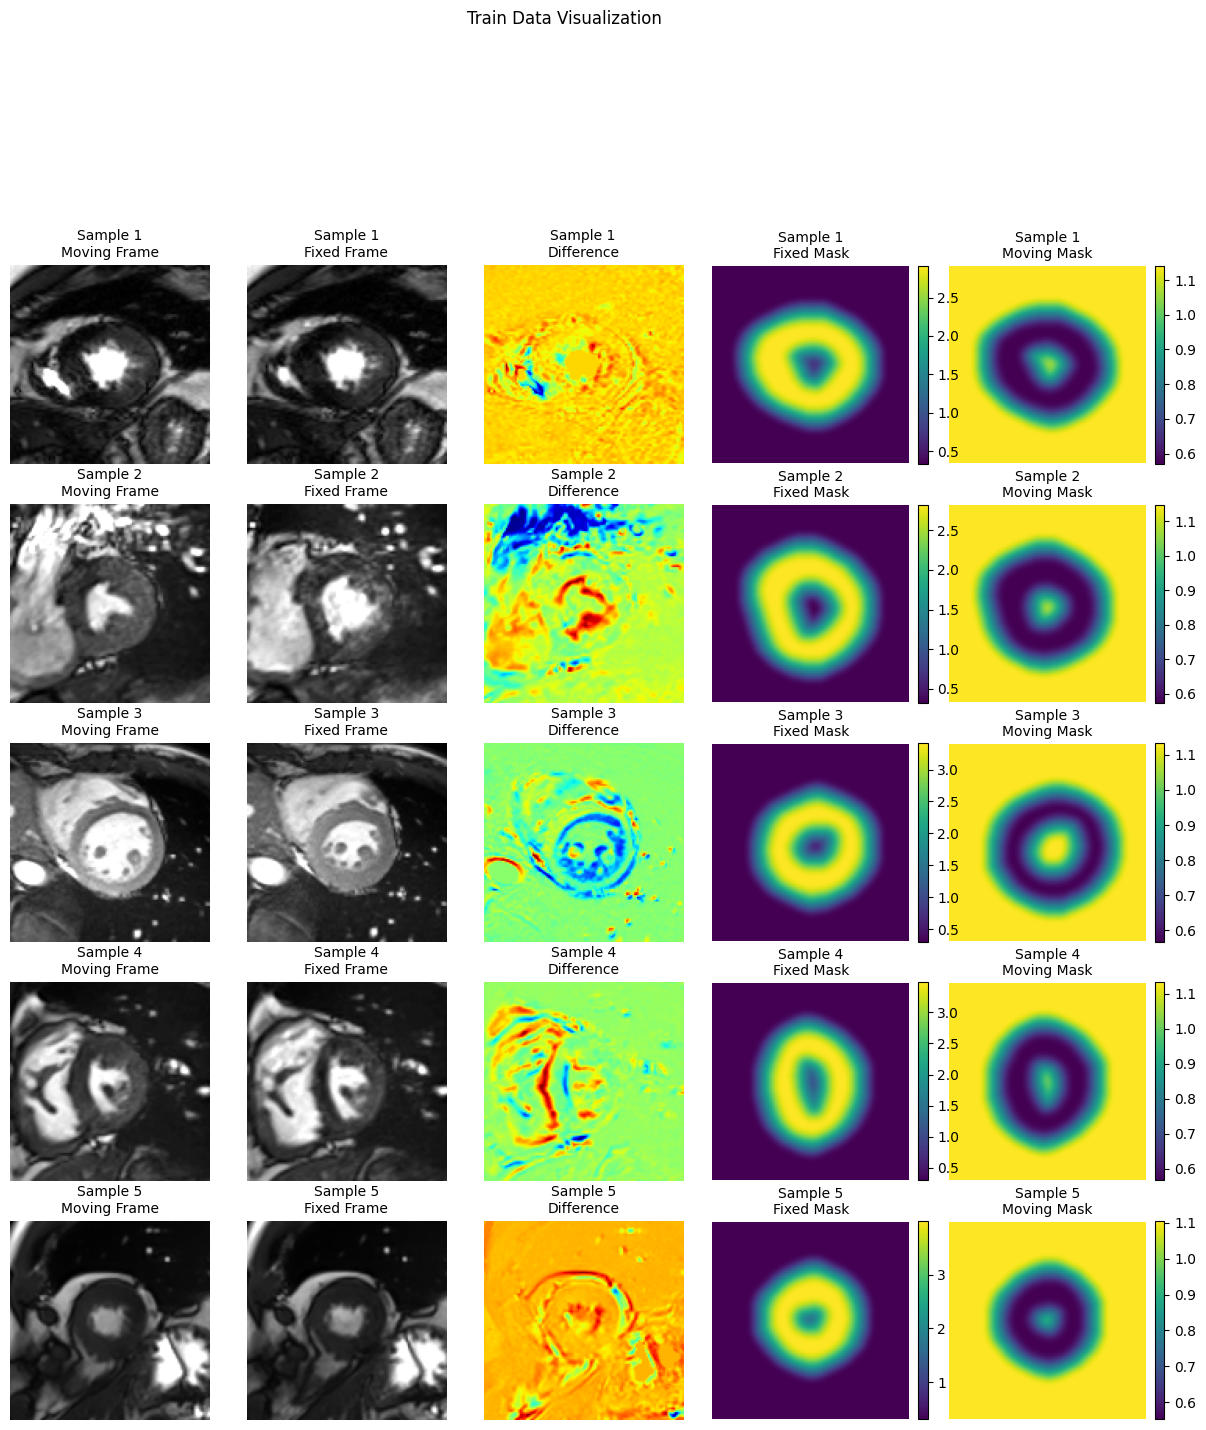

In [78]:
# Visualize masked data (VoxelMorph with mask input)
print("\nVisualizing Masked Data:")
visualize_batch(train_dataset_masked, mode='train', use_mask=True, num_samples=5)

##### Visualization functions

##### Strain calculation

In [20]:
def compute_strains(FrameDisplX, FrameDisplY, deltaX, deltaY):
    """
    Compute principal strains (Ep1, Ep2) and incompressibility strain (Ep3)
    from displacement fields.

    Args:
        FrameDisplX (np.ndarray): X displacement field (shape: H, W, T).
        FrameDisplY (np.ndarray): Y displacement field (shape: H, W, T).
        deltaX (float): Pixel spacing in the X direction (mm).
        deltaY (float): Pixel spacing in the Y direction (mm).

    Returns:
        Ep1All (np.ndarray): Principal strain 1 (shape: H, W, T).
        Ep2All (np.ndarray): Principal strain 2 (shape: H, W, T).
        Ep3All (np.ndarray): Incompressibility strain (shape: H, W, T).
    """
    # Compute spatial gradients
    UXx, UXy = np.gradient(FrameDisplX, deltaX, deltaY, axis=(0, 1))
    UYx, UYy = np.gradient(FrameDisplY, deltaX, deltaY, axis=(0, 1))

    # Compute Eulerian strain tensor components
    ExxAll = (2 * UXx - (UXx**2 + UYx**2)) / 2
    ExyAll = (UXy + UYx - (UXx * UXy + UYx * UYy)) / 2
    EyyAll = (2 * UYy - (UXy**2 + UYy**2)) / 2

    # Compute principal strains
    Ep1All = (ExxAll + EyyAll) / 2 + np.sqrt(((ExxAll - EyyAll) / 2) ** 2 + ExyAll ** 2)
    Ep2All = (ExxAll + EyyAll) / 2 - np.sqrt(((ExxAll - EyyAll) / 2) ** 2 + ExyAll ** 2)

    Ep1All, Ep2All, _ = enforce_full_principal_strain_order(Ep1All, Ep2All)

    # Compute incompressibility strain using the determinant rule
    Ep3All = 1 / ((1 + np.maximum(Ep1All, Ep2All)) * (1 + np.minimum(Ep1All, Ep2All))) - 1

    return Ep1All, Ep2All, Ep3All


def enforce_full_principal_strain_order(Ep1All, Ep2All, Ep3All=None):
    """
    Ensure Ep1All >= Ep2All >= Ep3All at every voxel (pixel) location.
    Sorts the three principal strains per point.

    Args:
        Ep1All (np.ndarray): First principal strain field.
        Ep2All (np.ndarray): Second principal strain field.
        Ep3All (np.ndarray): Third principal strain field (incompressibility strain).

    Returns:
        Ep1_sorted (np.ndarray): Largest principal strain.
        Ep2_sorted (np.ndarray): Middle principal strain.
        Ep3_sorted (np.ndarray): Smallest principal strain.
    """

    if Ep3All is not None:
        # Stack all principal strains along a new axis
        strain_stack = np.stack([Ep1All, Ep2All, Ep3All], axis=0)  # Shape (3, H, W, T)
    else:
        # Stack only the first two principal strains
        strain_stack = np.stack([Ep1All, Ep2All, Ep2All], axis=0) # Shape (2, H, W, T)
    # Sort along the new axis (axis=0) descending
    strain_sorted = np.sort(strain_stack, axis=0)[::-1, ...]  # Reverse to get descending

    Ep1_sorted = strain_sorted[0]
    Ep2_sorted = strain_sorted[1]
    Ep3_sorted = strain_sorted[2]

    return Ep1_sorted, Ep2_sorted, Ep3_sorted


##### Save Visualization

In [21]:
def save_images(moving, fixed, warped, disp, save_dir, batch_idx):
    """Save enhanced visualizations with strain analysis and consistent difference maps."""
    os.makedirs(save_dir, exist_ok=True)
    batch_size = moving.shape[0]
    # print(f"Type of moving: {type(moving)}, fixed: {type(fixed)}, warped: {type(warped)}, disp: {type(disp)}")

    # Ensure fixed has shape (batch, H, W, 1)
    if fixed.shape[-1] != 1:
        fixed = fixed[..., :1]  # Take the image channel only
    # print(f"Fixed for save_images - Shape: {fixed.shape}, Min: {fixed.min():.4f}, Max: {fixed.max():.4f}")

    for i in range(batch_size):
        # Extract images with proper dimension handling
        moving_img = moving[i, ..., 0].squeeze()
        warped_img = warped[i, ..., 0].squeeze()
        fixed_img = fixed[i, ..., 0].squeeze()

        # Extract displacement fields
        frame_displ_x = disp[i, ..., 0]
        frame_displ_y = disp[i, ..., 1]
        # print(f"Sample {i} Displacement Stats: X min={frame_displ_x.min():.4f}, max={frame_displ_x.max():.4f}, mean={frame_displ_x.mean():.4f}")
        # print(f"Sample {i} Displacement Stats: Y min={frame_displ_y.min():.4f}, max={frame_displ_y.max():.4f}, mean={frame_displ_y.mean():.4f}")

        # Calculate strain
        result = compute_strains(frame_displ_x, frame_displ_y, 1.0, 1.0)
        Ep1All, Ep2All, Ep3All = result
        final_strain = {'E1': Ep1All, 'E2': Ep2All, 'E3': Ep3All}

        # Create a figure with 3 rows and 5 columns
        fig, axes = plt.subplots(3, 5, figsize=(40, 21), constrained_layout=True)
        fig.suptitle(f"Sample {i} Analysis", fontsize=34, y=1.02)

        # --- First Row: Core Images ---
        images = [moving_img, fixed_img, warped_img]
        titles = ["Moving Image", "Fixed Image", "Warped Image"]

        Current_Row = 0

        for j, (img, title) in enumerate(zip(images, titles)):
            axes[Current_Row, j].imshow(img, cmap='gray')
            axes[Current_Row, j].set_title(title, fontsize=28)
            axes[Current_Row, j].axis('off')

        # Create RGB image: R and G from warped, B from fixed
        warped_norm = (warped_img - warped_img.min()) / (np.ptp(warped_img))
        fixed_norm = (fixed_img - fixed_img.min()) / (np.ptp(fixed_img))
        moving_norm = (moving_img - moving_img.min()) / (np.ptp(moving_img))

        rgb_wrpd_fxd = np.stack([
            warped_norm,      # Red channel
            fixed_norm,      # Green channel
            fixed_norm        # Blue channel
        ], axis=-1)

        axes[Current_Row, 3].imshow(rgb_wrpd_fxd)
        axes[Current_Row, 3].set_title("Warped (Red) over Fixed (RGB)", fontsize=28)
        axes[Current_Row, 3].axis('off')

        rgb_mvg_fxd = np.stack([
            moving_norm,      # Red channel
            fixed_norm,      # Green channel
            fixed_norm        # Blue channel
        ], axis=-1)

        axes[Current_Row, 4].imshow(rgb_mvg_fxd)
        axes[Current_Row, 4].set_title("Moving (Red) over Fixed (RGB)", fontsize=28)
        axes[Current_Row, 4].axis('off')

        # --- Second Row: Strain Analysis (Heatmaps) ---
        Current_Row = 2
        strain_min = min(np.min(final_strain['E1']), np.min(final_strain['E2']))
        strain_max = max(np.max(final_strain['E1']), np.max(final_strain['E2']))
        abs_max = max(abs(strain_min), abs(strain_max))
        vmin, vmax = -abs_max, abs_max  # Symmetric colormap
        vmin, vmax = -0.5, 0.5  # Symmetric colormap

        strain_images = [final_strain['E1'], final_strain['E2']]
        strain_titles = ["Final E1 Strain", "Final E2 Strain"]

        for j, (strain_img, title) in enumerate(zip(strain_images, strain_titles)):
            im = axes[Current_Row, j].imshow(strain_img, cmap='jet', vmin=vmin, vmax=vmax)
            axes[Current_Row, j].set_title(title, fontsize=28)
            axes[Current_Row, j].axis('off')
            if j == 0:
                add_colorbar(fig, axes[Current_Row, j], im, label='')
            else:
                add_colorbar(fig, axes[Current_Row, j], im, label="Strain (unitless)")

        diff = fixed_img - warped_img
        im6 = axes[Current_Row, 2].imshow(diff, cmap='bwr', vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
        axes[Current_Row, 2].set_title("Warped Difference", fontsize=28)
        axes[Current_Row, 2].axis('off')
        add_colorbar(fig, axes[Current_Row, 2], im6, label="Intensity Difference")

        axes[Current_Row, 3].axis('off')
        axes[Current_Row, 4].axis('off')

        # --- Third Row: Strain Overlays on Fixed Image ---
        Current_Row = 1
        overlay_titles = ["E1 Strain Overlay", "E2 Strain Overlay"]

        for j, (strain_img, title) in enumerate(zip(strain_images, overlay_titles)):
            axes[Current_Row, j].imshow(fixed_img, cmap='gray', alpha=0.95)
            im_overlay = axes[Current_Row, j].imshow(strain_img, cmap='jet', alpha=0.5, vmin=vmin, vmax=vmax)
            axes[Current_Row, j].set_title(title, fontsize=28)
            axes[Current_Row, j].axis('off')
            if j == 0:
                add_colorbar(fig, axes[Current_Row, j], im_overlay, label='')
            else:
                add_colorbar(fig, axes[Current_Row, j], im_overlay, label="Strain (unitless)")

        error_map = np.abs(fixed_norm - warped_norm)
        vmin_error = min(np.min(np.abs(fixed_norm - warped_norm)), np.min(np.abs(fixed_norm - moving_norm)))
        vmax_error = max(np.max(np.abs(fixed_norm - warped_norm)), np.max(np.abs(fixed_norm - moving_norm)))

        im = axes[Current_Row, 3].imshow(error_map, cmap='hot', vmin=vmin_error, vmax=vmax_error)
        axes[Current_Row, 3].set_title("F-W Local Registration Error Heatmap", fontsize=28)
        axes[Current_Row, 3].axis('off')
        add_colorbar(fig, axes[Current_Row, 3], im, label="")

        error_map = np.abs(fixed_norm - moving_norm)
        im = axes[Current_Row, 4].imshow(error_map, cmap='hot', vmin=vmin_error, vmax=vmax_error)
        axes[Current_Row, 4].set_title("F-M Local Registration Error Heatmap", fontsize=28)
        axes[Current_Row, 4].axis('off')
        add_colorbar(fig, axes[Current_Row, 4], im, label="Absolute Intensity Difference")

        axes[Current_Row, 2].axis('off')
        # Print MSE for the differences
        mse_fw = np.mean((fixed_img - warped_img) ** 2)
        mse_fm = np.mean((fixed_img - moving_img) ** 2)
        axes[Current_Row, 2].set_title(f"F-W MSE: {mse_fw:.4f}", fontsize=28)
        axes[Current_Row, 4].set_title(f"F-M MSE: {mse_fm:.4f}", fontsize=28)

        # Save figure
        save_path = os.path.join(save_dir, f"sample_{i}_batch_{batch_idx}.png")
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close(fig)

def add_colorbar(fig, ax, im, label):
    """Adds a colorbar to the given axes."""
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.set_ylabel(label, rotation=270, labelpad=15)

##### Visualize

In [22]:
def visualize_model(model, dataset, save_dir, num_batches=5, use_mask=False,debug=False, debug_data=None):
    """
    Visualize and save images for a few batches, optionally handling fixed images with masks.

    This function generates visualizations for a specified number of batches of images
    using the provided model and saves the results to a designated directory. It fetches
    batches of moving and fixed images from the test generator, makes predictions with
    the model, and calls the save_images function to handle the visualization and saving.

    Parameters:
    - model (tf.keras.Model): The trained model used for making predictions on the input images.
    - test_gen (generator): A generator that yields batches of moving and fixed images. If use_mask=True,
      the fixed image is expected to have a mask as the second channel.
    - save_dir (str): The directory where visualizations will be saved.
    - delta_x (float): X-direction spatial step, used in strain calculations.
    - delta_y (float): Y-direction spatial step, used in strain calculations.
    - strain_ep_peak (float): Maximum allowable strain threshold used in strain validation.
    - num_batches (int): The number of batches to visualize (default is 5).
    - use_mask (bool): Whether the fixed image includes a mask as the second channel (default is False).

    Returns:
    None
    """
    os.makedirs(save_dir, exist_ok=True)

    for batch_idx in tqdm(range(num_batches), desc="Visualizing"):
        # Get batch of inputs from the test generator
        if debug:
            inputs = debug_data
            moving = inputs['moving']
            fixed = inputs['fixed']
        else:
            # inputs, _ = next(test_gen)
            # moving, fixed = inputs
            iterator = iter(dataset)
            (moving, fixed), (warped, _) = next(iterator)
            
        # Ensure moving and fixed have the type np.ndarray
        if not isinstance(moving, np.ndarray):
            moving = moving.numpy()
        if not isinstance(fixed, np.ndarray):
            fixed = fixed.numpy()   

        # Make predictions using the model
        warped, disp = model.predict([moving, fixed], verbose=0)
        # Ensure warped and disp have the type np.ndarray
        if not isinstance(warped, np.ndarray):
            warped = warped.numpy()
        if not isinstance(disp, np.ndarray):    
            disp = disp.numpy()
        

        # Extract fixed image (and mask if applicable)
        # Handle fixed image dimensions
        if use_mask:
            fixed_img = fixed[..., 0:1]  # Keep channel dim for MSE
        else:
            fixed_img = fixed

        # Save visualizations by calling the save_images function
        save_images(moving, fixed_img, warped, disp, save_dir, batch_idx)

##### analyzing trained model function

In [23]:
def analyze_debug_data(model_config, kernel_key, lambda_val, model_folder, debug_data, dataset, use_mask=False):
    """Run and save analysis on debug data for a trained model"""
    print(f"\n{'='*40}")
    print(f"Running debug analysis for {os.path.basename(model_folder)}")
    print(f"{'='*40}")

    # Reload the model to ensure consistent state
    model = load_model_for_eval(model_config, kernel_key, lambda_val)
    if not model:
        print(f"Failed to load model for {model_folder}. Skipping debug analysis.")
        return

    try:
        # Prepare debug data
        moving = debug_data['moving']

        # Adjust fixed image based on use_mask
        if use_mask:
            fixed = debug_data['fixed']  # Shape: (4, 128, 128, 3)
        else:
            fixed = debug_data['fixed'][..., :1]  # Shape: (4, 128, 128, 1)

        # Create a new debug_data dict with the adjusted fixed image
        adjusted_debug_data = {
            'moving': moving,
            'fixed': fixed,
            'warped': debug_data.get('warped', None),
            'displacements': debug_data.get('displacements', None)
        }

        # Create save directory
        debug_save_dir = os.path.join(model_folder, 'results', 'debug_analysis')
        os.makedirs(debug_save_dir, exist_ok=True)

        # Use visualize_model with debug=True to ensure debug_data is used
        visualize_model(
            model,
            dataset,
            debug_save_dir,
            num_batches=1,
            use_mask=use_mask,
            debug=True,
            debug_data=adjusted_debug_data  # Use the adjusted debug_data
        )

        print(f"Debug analysis saved to: {debug_save_dir}")

    finally:
        if model:
            del model
        tf.keras.backend.clear_session()

#### Model Creation

##### MSE Loss

In [24]:
class MSE:
    """
    Sigma-weighted mean squared error for image reconstruction.
    """

    def __init__(self, image_sigma=1.0):
        self.image_sigma = image_sigma

    def mse(self, y_true, y_pred):
        return K.square(y_true - y_pred)

    def loss(self, y_true, y_pred, reduce='mean'):
        # compute mse
        mse = self.mse(y_true, y_pred)

        mask = y_true[..., 1]  # Second channel for fixed mask
        # apply mask
        mse = mse * tf.expand_dims(mask, axis=-1)

        # reduce
        if reduce == 'mean':
            mse = K.mean(mse)
        elif reduce == 'max':
            mse = K.max(mse)
        elif reduce is not None:
            raise ValueError(f'Unknown MSE reduction type: {reduce}')
        # loss
        return 1.0 / (self.image_sigma ** 2) * mse


##### Smootheness Loss

In [25]:
class Grad:
    """
    N-D gradient loss.
    loss_mult can be used to scale the loss value - this is recommended if
    the gradient is computed on a downsampled vector field (where loss_mult
    is equal to the downsample factor).
    """

    def __init__(self, penalty='l1', loss_mult=None, vox_weight=None):
        self.penalty = penalty
        self.loss_mult = loss_mult
        self.vox_weight = vox_weight

    def _diffs(self, y):
        vol_shape = y.get_shape().as_list()[1:-1]
        ndims = len(vol_shape)

        df = [None] * ndims
        for i in range(ndims):
            d = i + 1
            # permute dimensions to put the ith dimension first
            r = [d, *range(d), *range(d + 1, ndims + 2)]
            yp = K.permute_dimensions(y, r)
            dfi = yp[1:, ...] - yp[:-1, ...]

            if self.vox_weight is not None:
                w = K.permute_dimensions(self.vox_weight, r)
                # TODO: Need to add square root, since for non-0/1 weights this is bad.
                dfi = w[1:, ...] * dfi

            # permute back
            # note: this might not be necessary for this loss specifically,
            # since the results are just summed over anyway.
            r = [*range(1, d + 1), 0, *range(d + 1, ndims + 2)]
            df[i] = K.permute_dimensions(dfi, r)

        return df

    def loss(self, y_true, y_pred):
        """
        returns Tensor of size [bs]
        """
        mask = y_true[..., 1]  # [batch, H, W]
        mask = tf.expand_dims(mask, -1)  # [batch, H, W, 1]

        # Resize the mask to match the spatial dimensions of y_pred
        target_size = tf.shape(y_pred)[1:3]  # assuming y_pred shape: [batch, new_H, new_W, channels]
        # Use bilinear interpolation for continuous values
        mask = tf.image.resize(mask, size=target_size, method="bilinear")

        self.vox_weight = mask

        # Reset y_true[..., 1] to zero to restore it as zero_phi
        x_channel = y_true[..., 0:1]  # [batch, H, W, 1]
        zero_channel = tf.zeros_like(x_channel)  # [batch, H, W, 1]
        y_true = tf.concat([x_channel, zero_channel], axis=-1)  # [batch, H, W, 2]

        if self.penalty == 'l1':
            dif = [tf.abs(f) for f in self._diffs(y_pred)]
        else:
            assert self.penalty == 'l2', 'penalty can only be l1 or l2. Got: %s' % self.penalty
            dif = [f * f for f in self._diffs(y_pred)]

        df = [tf.reduce_mean(K.batch_flatten(f), axis=-1) for f in dif]
        grad = tf.add_n(df) / len(df)

        if self.loss_mult is not None:
            grad *= self.loss_mult

        return grad

    def mean_loss(self, y_true, y_pred):
        """
        returns Tensor of size ()
        """

        return K.mean(self.loss(y_true, y_pred))

##### Model params

In [26]:
def create_voxelmorph_model(use_mse_mask=False, use_smoothness_mask=False, kernel_config='default', lambda_val=0.1):
    input_shape = (128, 128)
    src_feats = 1  # Moving image has 1 channel
    trg_feats = 3 if (use_mse_mask or use_smoothness_mask) else 1  # Fixed image + mask channels

    # Input layers
    source_input = tf.keras.Input(shape=(*input_shape, src_feats), name='source_input')
    target_input = tf.keras.Input(shape=(*input_shape, trg_feats), name='target_input')

    # Build VxmDense model
    nb_features = [
        [16, 32, 32, 32],  # encoder
        [32, 32, 32, 32, 32, 16, 16]  # decoder
    ]

    # Get kernel configuration
    kernels = KERNEL_CONFIGS[kernel_config] if USE_CUSTOM_VXM else None

    # Create base VxmDense model
    vm_model = vxm.networks.VxmDense(
        inshape=input_shape,
        nb_unet_features=nb_features,
        unet_kernel_sizes=kernels,
        src_feats=src_feats,
        trg_feats=trg_feats,
        input_model=tf.keras.Model(inputs=[source_input, target_input], outputs=[source_input, target_input]),
        int_steps=5,
        reg_field = 'warp'
    )

    # Configure losses
    losses = []
    loss_weights = []

    # Loss functions
    losses = []
    loss_weights = []

    # 1. MSE Loss (with optional mask)
    if use_mse_mask:
        # Custom MSE loss with BG-to-myocardium ratio mask
        losses.append(MSE().loss)
    else:
        losses.append(vxm.losses.MSE().loss)

    loss_weights.append(1)  # Weight for similarity loss

    # 2. Smoothness Loss (with optional mask)
    if use_smoothness_mask:
        # Custom smoothness loss
        losses.append(Grad('l2').loss)
    else:
        losses.append(vxm.losses.Grad('l2').loss)

    loss_weights.append(lambda_val)  # Weight for smoothness loss

    # Compile model
    vm_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=losses,
        loss_weights=loss_weights
    )
    return vm_model

##### Callbacks

In [27]:
def get_callbacks(model_folder):
    """
    Returns a list of callbacks for training.

    Parameters:
    - model_folder (str): Path to the model directory where logs and weights will be saved.

    Returns:
    - List of Keras callbacks.
    """
    return [
        ModelCheckpoint(
            filepath=os.path.join(model_folder, 'weights', 'epoch{epoch:02d}_loss{loss:.5f}_val_loss_{val_loss:.5f}.weights.h5'),
            save_weights_only=True,
            save_freq='epoch',
            verbose=1
        ),
        ModelCheckpoint(
            filepath=os.path.join(model_folder, 'weights', 'best_model_val_loss.weights.h5'),
            monitor='val_loss',
            save_weights_only=True,
            save_best_only=True,
            verbose=1
        ),
        CSVLogger(os.path.join(model_folder, 'logs', 'training_log.csv')),
        EarlyStopping(
            monitor='val_loss',
            patience=30,
            mode='min',
            verbose=1,
            restore_best_weights=True
        )
    ]

###### Optimized

In [28]:
class OptimizedLossMonitor(tf.keras.callbacks.Callback):
    """Enhanced loss monitoring with automatic NaN/Inf detection and recovery."""
    
    def __init__(self, patience: int = 3):
        super().__init__()
        self.patience = patience
        self.nan_inf_count = 0
        
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        
        has_nan_inf = False
        if loss is not None and (tf.math.is_nan(loss) or tf.math.is_inf(loss)):
            print(f"⚠️ Training loss became NaN/Inf at epoch {epoch + 1}")
            has_nan_inf = True
            
        if val_loss is not None and (tf.math.is_nan(val_loss) or tf.math.is_inf(val_loss)):
            print(f"⚠️ Validation loss became NaN/Inf at epoch {epoch + 1}")
            has_nan_inf = True
            
        if has_nan_inf:
            self.nan_inf_count += 1
            if self.nan_inf_count >= self.patience:
                print(f"🛑 Stopping training: Loss became NaN/Inf for {self.nan_inf_count} consecutive epochs")
                self.model.stop_training = True
        else:
            self.nan_inf_count = 0  # Reset counter on good epoch

class OptimizedModelCheckpoint(tf.keras.callbacks.Callback):
    """Custom checkpoint callback with better file management and optimizer state saving."""
    
    def __init__(self, filepath: str, monitor: str = 'val_loss', save_best_only: bool = False, 
                 save_optimizer: bool = True, verbose: int = 1):
        super().__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.save_best_only = save_best_only
        self.save_optimizer = save_optimizer
        self.verbose = verbose
        self.best_value = float('inf')
        
    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.monitor)
        
        if current_value is None:
            print(f"⚠️ Warning: {self.monitor} not found in logs")
            return
            
        save_model = False
        if self.save_best_only:
            if current_value < self.best_value:
                self.best_value = current_value
                save_model = True
        else:
            save_model = True
            
        if save_model:
            # Format filepath with epoch and metric value
            filepath = self.filepath.format(epoch=epoch+1, **logs)
            
            try:
                # Save model weights
                self.model.save_weights(filepath)
                
                # Save optimizer state and training metadata
                if self.save_optimizer:
                    metadata = {
                        'epoch': epoch + 1,
                        'optimizer_state': self.model.optimizer.get_config(),
                        'metrics': logs,
                        'best_value': self.best_value
                    }
                    
                    metadata_path = filepath.replace('.weights.h5', '_metadata.json')
                    with open(metadata_path, 'w') as f:
                        json.dump(metadata, f, indent=2, default=str)
                
                if self.verbose:
                    print(f"💾 Saved checkpoint: {filepath}")
                    
            except Exception as e:
                print(f"❌ Error saving checkpoint: {e}")

def get_optimized_callbacks(model_folder: str) -> List[tf.keras.callbacks.Callback]:
    """Get optimized callbacks for training."""
    weights_dir = os.path.join(model_folder, 'weights')
    logs_dir = os.path.join(model_folder, 'logs')
    
    os.makedirs(weights_dir, exist_ok=True)
    os.makedirs(logs_dir, exist_ok=True)
    
    return [
        # Save every epoch with metadata
        OptimizedModelCheckpoint(
            filepath=os.path.join(weights_dir, 'epoch_{epoch:03d}_loss_{loss:.6f}_val_loss_{val_loss:.6f}.weights.h5'),
            save_best_only=False,
            save_optimizer=True,
            verbose=1
        ),
        # Save best model
        OptimizedModelCheckpoint(
            filepath=os.path.join(weights_dir, 'best_model_val_loss.weights.h5'),
            monitor='val_loss',
            save_best_only=True,
            save_optimizer=True,
            verbose=1
        ),
        # Enhanced loss monitoring
        OptimizedLossMonitor(patience=3),
        # Standard callbacks with optimized settings
        CSVLogger(os.path.join(logs_dir, 'training_log.csv'), append=True),
        EarlyStopping(
            monitor='val_loss',
            patience=25,  # Reduced from 30 for faster convergence detection
            mode='min',
            verbose=1,
            restore_best_weights=True
        )
    ]

#### Model Loading

In [29]:
def load_model_with_resume(config: Dict, kernel_key: str, lambda_val: float, 
                          epoch: Optional[int] = None) -> Tuple[tf.keras.Model, int]:
    """
    Load model with robust resume capability.
    
    Args:
        config: Model configuration dictionary.
        kernel_key: Kernel configuration key.
        lambda_val: Lambda value for smoothness loss.
        epoch: Specific epoch to load (optional).

    Returns:
        Tuple of (model, starting_epoch)
    """
    model_dir = os.path.join(
        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
        'weights'
    )
    
    # Create fresh model
    model = create_voxelmorph_model(
        use_mse_mask=config['use_mse_mask'],
        use_smoothness_mask=config['use_smoothness_mask'],
        kernel_config=kernel_key,
        lambda_val=lambda_val
    )
    
    starting_epoch = 0
    
    if not os.path.exists(model_dir):
        print(f"📁 Creating new model directory: {model_dir}")
        os.makedirs(model_dir, exist_ok=True)
        return model, starting_epoch
    
    # Find all weight files
    weight_files = [f for f in os.listdir(model_dir) if f.endswith('.weights.h5')]
    
    if not weight_files:
        print("🆕 No existing checkpoints found. Starting fresh training.")
        return model, starting_epoch
    
    if epoch is not None:
        # Load specific epoch
        target_files = [f for f in weight_files if f.startswith(f'epoch{epoch:02d}_')]
        if not target_files:
            print(f"⚠️ Checkpoint for epoch {epoch} not found. Starting fresh.")
            return model, starting_epoch
        checkpoint_file = target_files[0]
        starting_epoch = epoch
    else:
        # Check for best model checkpoint first
        best_model_file = 'best_model_val_loss.weights.h5'
        if best_model_file in weight_files:
            checkpoint_file = best_model_file
            # For best model, we don't know the exact epoch, so we start from 0 or load from metadata
            starting_epoch = 0
        else:
            # Fallback to latest epoch-based checkpoint
            epoch_files = [f for f in weight_files if f.startswith('epoch')]
            if not epoch_files:
                print("🆕 No epoch-based checkpoints found. Starting fresh training.")
                return model, starting_epoch
            epoch_files.sort(key=lambda x: os.path.getctime(os.path.join(model_dir, x)), reverse=True)
            checkpoint_file = epoch_files[0]
            
            # Extract epoch from filename
            try:
                import re
                match = re.search(r'epoch(\d+)_', checkpoint_file)
                if match:
                    starting_epoch = int(match.group(1))
            except:
                starting_epoch = 0
    
    checkpoint_path = os.path.join(model_dir, checkpoint_file)
    
    try:
        model.load_weights(checkpoint_path)
        print(f"✅ Resumed from checkpoint: {checkpoint_file} (epoch {starting_epoch})")
        
        # Load optimizer state if available
        metadata_path = checkpoint_path.replace('.weights.h5', '_metadata.json')
        if os.path.exists(metadata_path):
            try:
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                print(f"📊 Loaded training metadata from epoch {metadata.get('epoch', 'unknown')}")
                # Update starting_epoch if metadata provides it (especially for best_model_val_loss)
                if 'epoch' in metadata and isinstance(metadata['epoch'], int):
                    starting_epoch = metadata['epoch']
            except Exception as e:
                print(f"⚠️ Could not load metadata: {e}")
        
        return model, starting_epoch
        
    except Exception as e:
        print(f"❌ Error loading checkpoint {checkpoint_file}: {e}")
        print("🆕 Starting fresh training.")
        return model, 0

##### Weights loading

In [30]:
def load_model_for_eval(config, kernel_key, lambda_val, load_best=True, epoch=None):
    """
    Robust model loading with architecture verification to load either the best model
    based on validation loss or a specific epoch's weights.

    Args:
        config: Model configuration dictionary.
        kernel_key: Kernel configuration key.
        lambda_val: Lambda value for smoothness loss.
        load_best: If True, loads the best model based on validation loss; if False, loads the specified epoch.
        epoch: Epoch number to load (required if load_best=False, ignored otherwise).

    Returns:
        Loaded model or None if loading fails.
    """
    # Get model directory
    model_dir = os.path.join(
        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
        'weights'
    )

    # Check directory exists
    if not os.path.exists(model_dir):
        print(f"⚠️ Directory not found: {model_dir}")
        return None

    # Define custom objects
    custom_objects = {
        'Grad': Grad,
        'MSE': MSE,
        'Adam': tf.keras.optimizers.Adam,
        'vxm': vxm.losses  # If using original voxelmorph losses
    }

    if load_best:
        # Find all relevant model files
        model_files = [f for f in os.listdir(model_dir) if f.endswith('.weights.h5') and 
                       (f.startswith('best_model_val_loss_') or f.startswith('epoch'))]
        
        if not model_files:
            print(f"⛔ No model files found in {model_dir}")
            return None

        # Parse validation loss from filenames and find the best model
        best_model = None
        lowest_val_loss = float('inf')
        loss_type = None

        for model_file in model_files:
            val_loss = float('inf')
            loss_type_candidate = 'unknown'

            if model_file.startswith('best_model_val_loss'):
                # Best model file doesn't include loss in filename, so prioritize it
                val_loss = -1  # Negative to ensure this is chosen if present
                loss_type_candidate = 'val_loss'
            elif model_file.startswith('epoch'):
                # Extract validation loss from epoch-based files
                match = re.search(r'val_loss_(\d+\.\d+)', model_file)
                if match:
                    val_loss = float(match.group(1))
                    loss_type_candidate = 'val_loss'

            if val_loss < lowest_val_loss:
                lowest_val_loss = float('inf') if val_loss == -1 else val_loss
                best_model = model_file
                loss_type = loss_type_candidate

        if best_model is None:
            print(f"⛔ Could not determine best model in {model_dir}")
            return None

        model_path = os.path.join(model_dir, best_model)
        print(f"Loading best model: {best_model} {'with val_loss=' + str(lowest_val_loss) if loss_type == 'val_loss' and lowest_val_loss != float('inf') else ''}")

    else:
        # Load specific epoch weights
        if epoch is None:
            print("⛔ Epoch number must be specified when load_best=False")
            return None

        epoch_pattern = f'epoch{epoch:02d}_loss[0-9]+\.[0-9]+_val_loss_[0-9]+\.[0-9]+\.weights\.h5'
        model_files = [f for f in os.listdir(model_dir) if re.match(epoch_pattern, f)]
        if not model_files:
            print(f"⛔ No weight files found for epoch {epoch} in {model_dir}")
            return None

        if len(model_files) > 1:
            print(f"⚠️ Multiple files found for epoch {epoch}: {model_files}. Using the first one.")

        best_model = model_files[0]
        model_path = os.path.join(model_dir, best_model)
        print(f"Loading epoch-specific model: {best_model}")

    try:
        # Recreate model architecture first
        model = create_voxelmorph_model(
            use_mse_mask=config['use_mse_mask'],
            use_smoothness_mask=config['use_smoothness_mask'],
            kernel_config=kernel_key,
            lambda_val=lambda_val
        )

        # Load weights into architecture
        model.load_weights(model_path)
        print(f"✅ Successfully loaded {best_model}")
        return model

    except Exception as e:
        print(f"❌ Loading weights failed: {str(e)}")
        return None

#### Model training

##### New Code

In [90]:
def generate_loss_plot(history: tf.keras.callbacks.History, model_folder: str, test_mode: bool = False):
    """Generate and save loss curves."""
    try:
        plt.figure(figsize=(12, 5))
        
        # Training and validation loss
        plt.subplot(1, 2, 1)
        epochs_range = range(1, len(history.history["loss"]) + 1)
        plt.plot(epochs_range, history.history["loss"], 'b-', label="Training Loss", linewidth=2)
        if "val_loss" in history.history:
            plt.plot(epochs_range, history.history["val_loss"], 'r-', label="Validation Loss", linewidth=2)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"Training Progress{'(TEST MODE)' if test_mode else ''}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Learning rate (if available)
        plt.subplot(1, 2, 2)
        if "lr" in history.history:
            plt.plot(epochs_range, history.history["lr"], 'g-', linewidth=2)
            plt.xlabel("Epoch")
            plt.ylabel("Learning Rate")
            plt.title("Learning Rate Schedule")
            plt.grid(True, alpha=0.3)
            plt.yscale('log')
        
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(model_folder, "results", f"training_curves{'_TEST' if test_mode else ''}.png")
        plt.savefig(plot_path, dpi=150, bbox_inches='tight')
        plt.close()  # Important: close to free memory
        
        print(f"📊 Training curves saved: {plot_path}")
        
    except Exception as e:
        print(f"⚠️ Error generating loss plot: {e}")

In [91]:
# Memory management utilities
def cleanup_session():
    """Comprehensive cleanup of TensorFlow session and memory."""
    gc.collect()
    tf.keras.backend.clear_session()
    
    # Force GPU memory cleanup if available
    if tf.config.list_physical_devices('GPU'):
        try:
            tf.config.experimental.reset_memory_stats(tf.config.list_physical_devices('GPU')[0])
        except:
            pass

def create_model_with_memory_optimization(use_mse_mask=False, use_smoothness_mask=False, 
                                        kernel_config='default', lambda_val=0.1):
    """Create model with memory optimization settings."""
    
    # Set memory optimization
    tf.config.optimizer.set_jit(True)  # Enable XLA compilation
    
    # Your existing create_voxelmorph_model function here
    # (I'm not modifying this as it seems to work well)
    return create_voxelmorph_model(
        use_mse_mask=use_mse_mask,
        use_smoothness_mask=use_smoothness_mask,
        kernel_config=kernel_config,
        lambda_val=lambda_val
    )

In [92]:
# Example usage with the TrainingManager
def run_optimized_training_pipeline(model_config, kernel_keys, lambdas, 
                                  train_datasets, val_datasets, data_generators):
    """
    Run the complete optimized training pipeline.
    """
    
    # Initialize training manager
    training_manager = TrainingManager(MODELS_BASE_PATH)
    training_manager.load_or_initialize_progress()
    
    # Create model configurations in order: lambda -> kernel -> model
    model_configs_list = []
    for lambda_val in lambdas:
        for kernel_key in kernel_keys:
            for model_key in model_config:
                config = model_config[model_key]
                model_configs_list.append({
                    'model_key': model_key,
                    'kernel_key': kernel_key,
                    'lambda_val': lambda_val,
                    'config': config
                })
                
    # Initialize progress tracking
    for model_info in model_configs_list:
        model_key = model_info['model_key']
        kernel_key = model_info['kernel_key']
        lambda_val = str(model_info['lambda_val'])
        
        if model_key not in training_manager.training_progress:
            training_manager.training_progress[model_key] = {}
        if kernel_key not in training_manager.training_progress[model_key]:
            training_manager.training_progress[model_key][kernel_key] = {}
        if lambda_val not in training_manager.training_progress[model_key][kernel_key]:
            training_manager.training_progress[model_key][kernel_key][lambda_val] = {
                "trained": False, 
                "epochs_trained": 0,
                "last_val_loss": float('inf'),
                "training_time": 0
            }
    
    # Save initial progress
    training_manager.save_progress()
    
    # Training loop
    print("🚀 Starting optimized training pipeline")
    
    for model_info in model_configs_list:
        model_key = model_info['model_key']
        kernel_key = model_info['kernel_key']
        lambda_val = model_info['lambda_val']
        config = model_info['config']
        
        progress = training_manager.training_progress[model_key][kernel_key][str(lambda_val)]
        
        # Skip if already trained
        if progress["trained"]:
            print(f"⏭️ Skipping {config['name']} (kernel={kernel_key}, λ={lambda_val}) - already trained")
            continue
        
        print(f"\n🎯 Training: {config['name']} (kernel={kernel_key}, λ={lambda_val})")
        print(f"📈 Resume from epoch: {progress['epochs_trained']}")
        
        try:
            import time
            start_time = time.time()
            
            # Load model with resume capability
            model, starting_epoch = load_model_with_resume(config, kernel_key, lambda_val, 
                                                         progress["epochs_trained"] if progress["epochs_trained"] > 0 else None)
            
            # Select appropriate datasets
            if config['use_mask']:
                train_ds = train_datasets['masked']
                val_ds = val_datasets['masked']
                data_gen = data_generators['masked']
            else:
                train_ds = train_datasets['unmasked']
                val_ds = val_datasets['unmasked']
                data_gen = data_generators['unmasked']
            
            # Train model
            history, current_epoch = train_model_optimized(
                model=model,
                train_dataset=train_ds,
                val_dataset=val_ds,
                data_gen=data_gen,
                model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                config=config,
                kernel_key=kernel_key,
                lambda_val=lambda_val,
                epochs=100,
                resume_from_epoch=starting_epoch,
                test_mode=False
            )
            
            # Update progress
            training_time = time.time() - start_time
            progress["trained"] = (current_epoch >= 100)
            progress["epochs_trained"] = current_epoch
            progress["training_time"] += training_time
            
            if history and "val_loss" in history.history:
                progress["last_val_loss"] = float(min(history.history["val_loss"]))
            
            training_manager.save_progress()
            
            print(f"✅ Completed: {config['name']} (kernel={kernel_key}, λ={lambda_val})")
            print(f"⏱️ Training time: {training_time:.2f}s")

            analyze_debug_data(
                            model_config=config,
                            kernel_key=kernel_key,
                            lambda_val=lambda_val,
                            model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            debug_data=debug_data,
                            dataset=train_ds,
                            use_mask=config['use_mask']
                        )
            
        except Exception as e:
            print(f"❌ Error training {config['name']}: {e}")
            # Update progress with current state
            training_manager.save_progress()
            
        finally:
            # Cleanup
            if 'model' in locals():
                del model
            cleanup_session()
    
    print("🎉 Training pipeline completed!")
    return training_manager.training_progress

##### Training Manager

In [93]:
import os
import json
import gc
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
from typing import Dict, List, Optional, Tuple, Any

class TrainingManager:
    """Centralized training management with robust checkpointing and resume capabilities."""
    
    def __init__(self, models_base_path: str):
        self.models_base_path = models_base_path
        self.progress_file = os.path.join(models_base_path, "training_progress.json")
        self.test_results_file = os.path.join(models_base_path, "test_results.json")
        self.training_progress = {}
        self.test_results = {}
        
        # Memory optimization settings
        # tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
        
    def load_or_initialize_progress(self) -> None:
        """Load existing progress or initialize new tracking."""
        if os.path.exists(self.progress_file):
            try:
                with open(self.progress_file, 'r') as f:
                    self.training_progress = json.load(f)
                print(f"✅ Loaded training progress from {self.progress_file}")
            except Exception as e:
                print(f"⚠️ Error loading progress: {e}. Starting fresh.")
                self.training_progress = {}
        
        if os.path.exists(self.test_results_file):
            try:
                with open(self.test_results_file, 'r') as f:
                    self.test_results = json.load(f)
                print(f"✅ Loaded test results from {self.test_results_file}")
            except Exception as e:
                print(f"⚠️ Error loading test results: {e}")
                self.test_results = {}
    
    def save_progress(self) -> None:
        """Save current training progress."""
        try:
            os.makedirs(os.path.dirname(self.progress_file), exist_ok=True)
            with open(self.progress_file, 'w') as f:
                json.dump(self.training_progress, f, indent=2)
            print(f"💾 Saved progress to {self.progress_file}")
        except Exception as e:
            print(f"❌ Error saving progress: {e}")
    
    def save_test_results(self) -> None:
        """Save test results."""
        try:
            os.makedirs(os.path.dirname(self.test_results_file), exist_ok=True)
            with open(self.test_results_file, 'w') as f:
                json.dump(self.test_results, f, indent=2)
            print(f"💾 Saved test results to {self.test_results_file}")
        except Exception as e:
            print(f"❌ Error saving test results: {e}")


In [94]:
import os
import json
import time
import gc
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Tuple, Any
import tensorflow as tf

class EpochWiseProgressiveTrainingManager:
    """
    Manages epoch-wise progressive training where each epoch uses all data parts.
    Each model trains one epoch across all data parts before moving to the next epoch.
    Enhanced with complete history tracking.
    """
    
    def __init__(self, data_loader: 'HDF5DataLoader', num_parts: int, 
                 total_epochs: int = 100, training_manager: 'TrainingManager' = None):
        """
        Initialize epoch-wise progressive training manager.
        
        Args:
            data_loader: Initialized HDF5DataLoader instance
            num_parts: Number of parts to divide training data into
            total_epochs: Total number of epochs to train
            training_manager: Existing TrainingManager instance
        """
        self.data_loader = data_loader
        self.num_parts = num_parts
        self.total_epochs = total_epochs
        self.training_manager = training_manager
        self.current_epoch = 0
        
        # Get suggested ranges for training data
        self.train_ranges = self.data_loader.get_suggested_ranges('train', num_parts)
        self.val_ranges = self.data_loader.get_suggested_ranges('val', num_parts)
        
        # Initialize progress tracking
        self.epoch_progress = {}
        self._load_epoch_progress()
        
        # Complete history tracking for all models
        self.complete_histories = {}
        self._load_complete_histories()
        
        print(f"🔄 Epoch-wise Progressive Training Manager initialized:")
        print(f"   📊 Training data split into {num_parts} parts per epoch")
        print(f"   ⏱️ {total_epochs} total epochs")
        print(f"   🔄 Each epoch cycles through all {num_parts} data parts")
    
    def _load_epoch_progress(self):
        """Load epoch-wise training progress."""
        if self.training_manager and hasattr(self.training_manager, 'models_base_path'):
            progress_file = os.path.join(self.training_manager.models_base_path, "epoch_progress.json")
            if os.path.exists(progress_file):
                try:
                    with open(progress_file, 'r') as f:
                        self.epoch_progress = json.load(f)
                    print(f"✅ Loaded epoch-wise training progress")
                except Exception as e:
                    print(f"⚠️ Error loading epoch progress: {e}")
    
    def _save_epoch_progress(self):
        """Save epoch-wise training progress."""
        if self.training_manager and hasattr(self.training_manager, 'models_base_path'):
            progress_file = os.path.join(self.training_manager.models_base_path, "epoch_progress.json")
            try:
                os.makedirs(os.path.dirname(progress_file), exist_ok=True)
                with open(progress_file, 'w') as f:
                    json.dump(self.epoch_progress, f, indent=2)
            except Exception as e:
                print(f"❌ Error saving epoch progress: {e}")
    
    def _load_complete_histories(self):
        """Load complete training histories."""
        if self.training_manager and hasattr(self.training_manager, 'models_base_path'):
            history_file = os.path.join(self.training_manager.models_base_path, "complete_histories.json")
            if os.path.exists(history_file):
                try:
                    with open(history_file, 'r') as f:
                        self.complete_histories = json.load(f)
                    print(f"✅ Loaded complete training histories")
                except Exception as e:
                    print(f"⚠️ Error loading complete histories: {e}")
    
    def _save_complete_histories(self):
        """Save complete training histories."""
        if self.training_manager and hasattr(self.training_manager, 'models_base_path'):
            history_file = os.path.join(self.training_manager.models_base_path, "complete_histories.json")
            try:
                os.makedirs(os.path.dirname(history_file), exist_ok=True)
                with open(history_file, 'w') as f:
                    json.dump(self.complete_histories, f, indent=2)
            except Exception as e:
                print(f"❌ Error saving complete histories: {e}")
    
    def get_datasets_for_part(self, part_number: int) -> Tuple[Any, Any]:
        """
        Get datasets for specific part.
        
        Args:
            part_number: Which part to load (1-indexed)
            
        Returns:
            Tuple of (train_dataset, val_dataset)
        """
        if part_number < 1 or part_number > self.num_parts:
            raise ValueError(f"Part number must be between 1 and {self.num_parts}")
        
        # Get range for this part
        start_idx, end_idx = self.train_ranges[part_number - 1]
        
        # Update data loader range
        self.data_loader.update_index_range('train', start_idx, end_idx)
        self.data_loader.update_index_range('val', self.val_ranges[part_number - 1][0], 
                                            self.val_ranges[part_number - 1][1])
        
        # Create new datasets
        train_dataset = self.data_loader.get_dataset('train', load_in_memory=True)
        val_dataset = self.data_loader.get_dataset('val', load_in_memory=True)
        
        return train_dataset, val_dataset
    
    def get_model_history_key(self, model_key: str, kernel_key: str, lambda_val: float) -> str:
        """Generate unique key for complete model history."""
        return f"{model_key}_{kernel_key}_lambda_{lambda_val:.3f}"
    
    def get_model_progress_key(self, model_key: str, kernel_key: str, lambda_val: float) -> str:
        """Generate unique key for model progress."""
        return f"{model_key}_{kernel_key}_lambda_{lambda_val:.3f}"
    
    def is_model_completed(self, model_key: str, kernel_key: str, lambda_val: float) -> bool:
        """Check if a specific model is completed."""
        progress_key = self.get_model_progress_key(model_key, kernel_key, lambda_val)
        return self.epoch_progress.get(progress_key, {}).get('completed', False)
    
    def get_model_current_epoch(self, model_key: str, kernel_key: str, lambda_val: float) -> int:
        """Get current epoch for a model."""
        progress_key = self.get_model_progress_key(model_key, kernel_key, lambda_val)
        return self.epoch_progress.get(progress_key, {}).get('current_epoch', 0)
    
    def update_model_progress(self, model_key: str, kernel_key: str, lambda_val: float, 
                             current_epoch: int, completed: bool = False):
        """Update progress for a specific model."""
        progress_key = self.get_model_progress_key(model_key, kernel_key, lambda_val)
        
        if progress_key not in self.epoch_progress:
            self.epoch_progress[progress_key] = {}
        
        self.epoch_progress[progress_key].update({
            'model_key': model_key,
            'kernel_key': kernel_key,
            'lambda_val': lambda_val,
            'current_epoch': current_epoch,
            'completed': completed,
            'last_updated': time.time()
        })
        
        self._save_epoch_progress()
    
    def train_single_epoch_across_parts(self, model, model_config, model_key: str, 
                                       kernel_key: str, lambda_val: float, epoch_num: int) -> Dict:
        """
        Train a single epoch across all data parts.
        
        Args:
            model: The model to train
            model_config: Model configuration
            model_key: Model identifier
            kernel_key: Kernel identifier  
            lambda_val: Lambda value
            epoch_num: Current epoch number
            
        Returns:
            Dictionary with epoch metrics
        """
        print(f"  🔄 Epoch {epoch_num}: Training across {self.num_parts} data parts...")
        
        # Collect metrics for this epoch
        epoch_metrics = {
            'loss': [],
            'val_loss': [],
            'lr': None
        }
        
        total_train_batches = 0
        total_val_batches = 0
        
        # Train on each part
        for part in range(1, self.num_parts + 1):
            print(f"    📊 Part {part}/{self.num_parts}")
            
            # Get datasets for this part
            train_ds, val_ds = self.get_datasets_for_part(part)
            
            # Get number of batches for this part
            train_steps = self.data_loader.get_steps_per_epoch('train')
            val_steps = self.data_loader.get_steps_per_epoch('val')
            
            # Train on this part (1 epoch)
            part_history = model.fit(
                train_ds,
                validation_data=val_ds,
                epochs=1,
                steps_per_epoch=train_steps,
                validation_steps=val_steps,
                verbose=0,  # Quiet to avoid too much output
                callbacks=[]  # No callbacks for individual parts
            )
            
            # Collect metrics
            if part_history.history['loss']:
                epoch_metrics['loss'].extend(part_history.history['loss'])
            if part_history.history['val_loss']:
                epoch_metrics['val_loss'].extend(part_history.history['val_loss'])
            if part_history.history.get('lr') and epoch_metrics['lr'] is None:
                epoch_metrics['lr'] = part_history.history['lr'][0]
            
            total_train_batches += train_steps
            total_val_batches += val_steps
            
            # Clear memory
            del train_ds, val_ds
            gc.collect()
        
        # Calculate average metrics for the epoch
        avg_metrics = {
            'loss': np.mean(epoch_metrics['loss']) if epoch_metrics['loss'] else 0.0,
            'val_loss': np.mean(epoch_metrics['val_loss']) if epoch_metrics['val_loss'] else 0.0,
            'lr': epoch_metrics['lr'] if epoch_metrics['lr'] is not None else 0.001
        }
        
        print(f"    ✅ Epoch {epoch_num} completed - Loss: {avg_metrics['loss']:.6f}, "
              f"Val Loss: {avg_metrics['val_loss']:.6f}")
        
        return avg_metrics
    
    def accumulate_history(self, model_key: str, kernel_key: str, lambda_val: float, 
                          epoch_num: int, epoch_metrics: Dict):
        """
        Accumulate training history for complete tracking.
        
        Args:
            model_key: Model identifier
            kernel_key: Kernel identifier
            lambda_val: Lambda value
            epoch_num: Current epoch number
            epoch_metrics: Metrics from current epoch
        """
        history_key = self.get_model_history_key(model_key, kernel_key, lambda_val)
        
        # Initialize complete history if not exists
        if history_key not in self.complete_histories:
            self.complete_histories[history_key] = {
                'model_key': model_key,
                'kernel_key': kernel_key,
                'lambda_val': lambda_val,
                'history': {
                    'loss': [],
                    'val_loss': [],
                    'lr': [],
                    'epoch': []
                },
                'epoch_boundaries': []  # Track epochs
            }
        
        complete_hist = self.complete_histories[history_key]
        
        # Add epoch data
        complete_hist['history']['loss'].append(epoch_metrics['loss'])
        complete_hist['history']['val_loss'].append(epoch_metrics['val_loss'])
        complete_hist['history']['lr'].append(epoch_metrics['lr'])
        complete_hist['history']['epoch'].append(epoch_num)
        
        # Update metadata
        complete_hist['last_updated'] = time.time()
        complete_hist['total_epochs'] = len(complete_hist['history']['loss'])
        
        # Save complete histories
        self._save_complete_histories()
    
    def save_model_checkpoint(self, model, model_config, model_key: str, 
                             kernel_key: str, lambda_val: float, epoch_num: int, metrics: Dict):
        """Save model checkpoint for current epoch."""
        if not self.training_manager:
            return
            
        try:
            # Create model folder path
            model_folder = model_config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder']
            weights_dir = os.path.join(model_folder, 'weights')
            os.makedirs(weights_dir, exist_ok=True)
            
            # Save current epoch weights
            checkpoint_path = os.path.join(
                weights_dir, 
                f'epoch_{epoch_num:03d}_loss_{metrics["loss"]:.5f}_val_loss_{metrics["val_loss"]:.5f}.weights.h5'
            )
            model.save_weights(checkpoint_path)
            
            # Save best model if this is the best validation loss so far
            history_key = self.get_model_history_key(model_key, kernel_key, lambda_val)
            if history_key in self.complete_histories:
                val_losses = self.complete_histories[history_key]['history']['val_loss']
                if len(val_losses) == 0 or metrics['val_loss'] <= min(val_losses):
                    best_path = os.path.join(weights_dir, 'best_model_val_loss.weights.h5')
                    model.save_weights(best_path)
                    print(f"    💾 New best model saved (val_loss: {metrics['val_loss']:.6f})")
            
        except Exception as e:
            print(f"    ❌ Error saving checkpoint: {e}")

    def generate_complete_training_plots(self, output_dir: str = None):
        """Generate comprehensive training plots for all models."""
        if not self.complete_histories:
            print("⚠️ No complete histories to plot")
            return
        
        if output_dir is None and self.training_manager:
            output_dir = os.path.join(self.training_manager.models_base_path, "epoch_wise_training_plots")
        elif output_dir is None:
            output_dir = "epoch_wise_training_plots"
        
        os.makedirs(output_dir, exist_ok=True)
        
        print(f"📊 Generating epoch-wise training plots...")
        
        for history_key, hist_data in self.complete_histories.items():
            try:
                self._plot_individual_model_history(hist_data, output_dir)
            except Exception as e:
                print(f"❌ Error plotting {history_key}: {e}")
        
        # Generate summary comparison plots
        try:
            self._plot_models_comparison(output_dir)
        except Exception as e:
            print(f"❌ Error generating comparison plots: {e}")
        
        print(f"✅ Epoch-wise training plots saved to: {output_dir}")
    
    def _plot_individual_model_history(self, hist_data: Dict, output_dir: str):
        """Plot individual model's complete training history."""
        model_key = hist_data['model_key']
        kernel_key = hist_data['kernel_key']
        lambda_val = hist_data['lambda_val']
        history = hist_data['history']
        
        if not history['loss']:
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f"Epoch-wise Training History: {model_key} (kernel={kernel_key}, λ={lambda_val:.3f})", 
                    fontsize=14, fontweight='bold')
        
        epochs = history['epoch']
        
        # Plot 1: Loss curves
        ax1 = axes[0, 0]
        ax1.plot(epochs, history['loss'], 'b-', label='Training Loss', linewidth=2, marker='o', markersize=3)
        ax1.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=3)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training & Validation Loss (Epoch-wise)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Learning rate
        ax2 = axes[0, 1]
        if history['lr']:
            ax2.plot(epochs, history['lr'], 'g-', linewidth=2, marker='d', markersize=3)
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Learning Rate')
            ax2.set_title('Learning Rate Schedule')
            ax2.set_yscale('log')
            ax2.grid(True, alpha=0.3)
        else:
            ax2.text(0.5, 0.5, 'Learning Rate\nNot Tracked', ha='center', va='center', 
                    transform=ax2.transAxes, fontsize=12)
            ax2.set_xticks([])
            ax2.set_yticks([])
        
        # Plot 3: Loss improvement analysis
        ax3 = axes[1, 0]
        if len(history['loss']) > 5:
            # Calculate improvement per epoch
            loss_diff = np.diff(history['loss'])
            val_loss_diff = np.diff(history['val_loss'])
            
            ax3.plot(epochs[1:], loss_diff, 'b-', alpha=0.7, label='Train Loss Change')
            ax3.plot(epochs[1:], val_loss_diff, 'r-', alpha=0.7, label='Val Loss Change')
            ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
            ax3.set_xlabel('Epoch')
            ax3.set_ylabel('Loss Change')
            ax3.set_title('Per-Epoch Loss Improvement')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        
        # Plot 4: Training statistics
        ax4 = axes[1, 1]
        best_train_idx = np.argmin(history['loss'])
        best_val_idx = np.argmin(history['val_loss'])
        
        stats_text = f"""Epoch-wise Training Statistics:
        
Total Epochs: {len(history['loss'])}
Best Train Loss: {min(history['loss']):.6f} (epoch {epochs[best_train_idx]})
Best Val Loss: {min(history['val_loss']):.6f} (epoch {epochs[best_val_idx]})
Final Train Loss: {history['loss'][-1]:.6f}
Final Val Loss: {history['val_loss'][-1]:.6f}
Training Method: Each epoch across all data parts
"""
        
        ax4.text(0.1, 0.9, stats_text, transform=ax4.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace')
        ax4.set_xticks([])
        ax4.set_yticks([])
        ax4.set_title('Training Summary')
        
        plt.tight_layout()
        
        # Save plot
        filename = f"epoch_wise_history_{model_key}_{kernel_key}_lambda_{lambda_val:.3f}.png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, dpi=150, bbox_inches='tight')
        plt.close()
        
        print(f"📊 Saved individual plot: {filename}")
    
    def _plot_models_comparison(self, output_dir: str):
        """Generate comparison plots for all models."""
        if len(self.complete_histories) < 2:
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Epoch-wise Training Comparison - All Models', fontsize=14, fontweight='bold')
        
        # Plot 1: All training losses
        ax1 = axes[0, 0]
        for history_key, hist_data in self.complete_histories.items():
            if hist_data['history']['loss']:
                label = f"{hist_data['model_key']} (k={hist_data['kernel_key']}, λ={hist_data['lambda_val']:.3f})"
                ax1.plot(hist_data['history']['epoch'], hist_data['history']['loss'], 
                        label=label, linewidth=2, marker='o', markersize=2)
        
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Training Loss')
        ax1.set_title('Training Loss Comparison (Epoch-wise)')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: All validation losses
        ax2 = axes[0, 1]
        for history_key, hist_data in self.complete_histories.items():
            if hist_data['history']['val_loss']:
                label = f"{hist_data['model_key']} (k={hist_data['kernel_key']}, λ={hist_data['lambda_val']:.3f})"
                ax2.plot(hist_data['history']['epoch'], hist_data['history']['val_loss'], 
                        label=label, linewidth=2, marker='s', markersize=2)
        
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Validation Loss')
        ax2.set_title('Validation Loss Comparison (Epoch-wise)')
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Best performance comparison
        ax3 = axes[1, 0]
        model_names = []
        best_train_losses = []
        best_val_losses = []
        
        for hist_data in self.complete_histories.values():
            if hist_data['history']['loss']:
                model_names.append(f"{hist_data['model_key'][:8]}...")
                best_train_losses.append(min(hist_data['history']['loss']))
                best_val_losses.append(min(hist_data['history']['val_loss']))
        
        x = np.arange(len(model_names))
        width = 0.35
        
        ax3.bar(x - width/2, best_train_losses, width, label='Best Training Loss', alpha=0.8)
        ax3.bar(x + width/2, best_val_losses, width, label='Best Validation Loss', alpha=0.8)
        
        ax3.set_xlabel('Models')
        ax3.set_ylabel('Best Loss')
        ax3.set_title('Best Performance Comparison')
        ax3.set_xticks(x)
        ax3.set_xticklabels(model_names, rotation=45)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Training progress summary
        ax4 = axes[1, 1]
        progress_data = []
        
        for hist_data in self.complete_histories.values():
            progress_data.append({
                'model': f"{hist_data['model_key']}_{hist_data['kernel_key']}",
                'total_epochs': len(hist_data['history']['loss'])
            })
        
        models = [d['model'] for d in progress_data]
        epochs = [d['total_epochs'] for d in progress_data]
        
        bars = ax4.bar(models, epochs, alpha=0.7, color='skyblue')
        ax4.set_xlabel('Models')
        ax4.set_ylabel('Epochs Completed')
        ax4.set_title('Training Progress Summary (Epoch-wise Method)')
        ax4.set_xticklabels(models, rotation=45)
        ax4.grid(True, alpha=0.3)
        
        # Add epoch count on bars
        for bar, epoch_count in zip(bars, epochs):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{epoch_count}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        
        # Save comparison plot
        filepath = os.path.join(output_dir, "epoch_wise_models_comparison.png")
        plt.savefig(filepath, dpi=150, bbox_inches='tight')
        plt.close()
        
        print(f"📊 Saved comparison plot: epoch_wise_models_comparison.png")


def run_epoch_wise_progressive_training_pipeline(model_config, kernel_keys, lambdas, 
                                               data_loader, num_parts, total_epochs=100):
    """
    Run epoch-wise progressive training pipeline where each epoch uses all data parts.
    
    Args:
        model_config: Model configuration dictionary
        kernel_keys: List of kernel keys to train
        lambdas: List of lambda values to train
        data_loader: Initialized HDF5DataLoader
        num_parts: Number of parts to divide training into
        total_epochs: Total number of epochs to train
    """
    
    # Initialize managers
    training_manager = TrainingManager(MODELS_BASE_PATH)
    training_manager.load_or_initialize_progress()
    
    progressive_manager = EpochWiseProgressiveTrainingManager(
        data_loader=data_loader,
        num_parts=num_parts,
        total_epochs=total_epochs,
        training_manager=training_manager
    )
    
    # Create model configurations list
    model_configs_list = []
    for lambda_val in lambdas:
        for kernel_key in kernel_keys:
            for model_key in model_config:
                config = model_config[model_key]
                model_configs_list.append({
                    'model_key': model_key,
                    'kernel_key': kernel_key,
                    'lambda_val': lambda_val,
                    'config': config
                })
    
    print(f"🚀 Starting epoch-wise progressive training pipeline")
    print(f"   🎯 {len(model_configs_list)} model configurations")
    print(f"   📊 {total_epochs} epochs × {num_parts} data parts per epoch")
    print(f"   🔄 Training method: Each epoch across all data parts")
    
    try:
        # Train each model
        for model_info in model_configs_list:
            model_key = model_info['model_key']
            kernel_key = model_info['kernel_key']
            lambda_val = model_info['lambda_val']
            config = model_info['config']
            
            # Check if this model is already completed
            if progressive_manager.is_model_completed(model_key, kernel_key, lambda_val):
                print(f"⏭️ Skipping {config['name']} (kernel={kernel_key}, λ={lambda_val}) - already completed")
                continue
            
            print(f"\n{'='*80}")
            print(f"🎯 Training: {config['name']} (kernel={kernel_key}, λ={lambda_val})")
            print(f"{'='*80}")
            
            # Get current epoch for resuming
            current_epoch = progressive_manager.get_model_current_epoch(model_key, kernel_key, lambda_val)
            
            try:
                # Load or create model
                if current_epoch == 0:
                    # Start fresh
                    model, _ = load_model_with_resume(config, kernel_key, lambda_val, None)
                    print(f"✅ Created new model")
                else:
                    # Resume from checkpoint
                    model, _ = load_model_with_resume(config, kernel_key, lambda_val, current_epoch)
                    print(f"✅ Resumed model from epoch {current_epoch}")
                
                # Train epoch by epoch
                for epoch in range(current_epoch + 1, total_epochs + 1):
                    start_time = time.time()
                    
                    print(f"\n🔄 Epoch {epoch}/{total_epochs}")
                    
                    # Train one epoch across all parts
                    epoch_metrics = progressive_manager.train_single_epoch_across_parts(
                        model, config, model_key, kernel_key, lambda_val, epoch
                    )
                    
                    # Accumulate history
                    progressive_manager.accumulate_history(
                        model_key, kernel_key, lambda_val, epoch, epoch_metrics
                    )
                    
                    # Save checkpoint
                    progressive_manager.save_model_checkpoint(
                        model, config, model_key, kernel_key, lambda_val, epoch, epoch_metrics
                    )
                    
                    # Update progress
                    is_completed = (epoch >= total_epochs)
                    progressive_manager.update_model_progress(
                        model_key, kernel_key, lambda_val, epoch, is_completed
                    )
                    
                    epoch_time = time.time() - start_time
                    print(f"  ⏱️ Epoch time: {epoch_time:.2f}s")
                    
                    # Optional: Early stopping or learning rate adjustment logic can be added here
                    
                    # Memory cleanup
                    gc.collect()
                    if len(tf.config.list_physical_devices('GPU')) > 0:
                        tf.keras.backend.clear_session()
                
                print(f"✅ Completed training: {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                
            except Exception as e:
                print(f"❌ Error training {config['name']}: {e}")
                # Save progress even on error
                progressive_manager.update_model_progress(
                    model_key, kernel_key, lambda_val, 
                    progressive_manager.get_model_current_epoch(model_key, kernel_key, lambda_val), 
                    False
                )
                
            finally:
                # Cleanup
                if 'model' in locals():
                    del model
                cleanup_session()
    
    except KeyboardInterrupt:
        print("\n⏹️ Training interrupted by user. Saving progress...")
        progressive_manager._save_epoch_progress()
        progressive_manager.save_model_checkpoint(
            model, config, model_key, kernel_key, lambda_val, epoch, epoch_metrics
        )
        progressive_manager._save_complete_histories()
        
    except Exception as e:
        print(f"\n❌ Training pipeline error: {e}")
        progressive_manager._save_epoch_progress()
        progressive_manager.save_model_checkpoint(
            model, config, model_key, kernel_key, lambda_val, epoch, epoch_metrics
        )
        progressive_manager._save_complete_histories()
        
    finally:
        print(f"\n🎉 Progressive training pipeline completed!")
        
        # Generate complete training plots
        print(f"\n📊 Generating complete training plots...")
        progressive_manager.generate_complete_training_plots()
        
        progressive_manager._save_epoch_progress()
        progressive_manager._save_complete_histories()
        
    return progressive_manager.complete_histories

##### Train all models

In [95]:
def train_model_optimized(model: tf.keras.Model, train_dataset: tf.data.Dataset, 
                         val_dataset: tf.data.Dataset, data_gen: Any, model_folder: str,
                         config: Dict, kernel_key: str, lambda_val: float,
                         epochs: int = 100, resume_from_epoch: int = 0,
                         test_mode: bool = False) -> Tuple[tf.keras.callbacks.History, int]:
    """
    Optimized training function with better memory management and error handling.
    """
    print(f"🚀 Starting training for {model_folder}")
    
    # Create directories
    for subdir in ['weights', 'logs', 'results']:
        os.makedirs(os.path.join(model_folder, subdir), exist_ok=True)
    
    # Get optimized callbacks
    callbacks = get_optimized_callbacks(model_folder)
    
    # Calculate steps
    train_steps = data_gen.get_steps_per_epoch('train')
    val_steps = data_gen.get_steps_per_epoch('val')
    
    if test_mode:
        epochs = 2
        train_steps = min(3, train_steps)  # Increased from 2 for better testing
        val_steps = min(2, val_steps)      # Increased from 1
        print(f"🧪 TEST MODE: {epochs} epochs, {train_steps}/{val_steps} steps")
    
    # Optimize datasets
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE).repeat()
    val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE).repeat()
    
    # Data inspection (only in test mode to save time)
    if test_mode:
        print("🔍 Inspecting data batch...")
        try:
            for batch in train_dataset.take(1):
                (moving, fixed), (fixed_target, zero_phi) = batch
                print(f"Moving: {moving.shape}, Fixed: {fixed.shape}")
                print(f"Targets: {fixed_target.shape}, {zero_phi.shape}")
                break
        except Exception as e:
            print(f"⚠️ Data inspection failed: {e}")
    
    # Training loop with error handling  
    current_epoch = resume_from_epoch
    history = None
    
    try:
        print(f"🏃 Training: epochs {resume_from_epoch}->{epochs}, steps {train_steps}/{val_steps}")
        
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            steps_per_epoch=train_steps,
            validation_steps=val_steps,
            epochs=epochs,
            initial_epoch=resume_from_epoch,
            callbacks=callbacks,
            verbose=1
        )
        
        current_epoch = epochs
        print(f"✅ Training completed successfully!")
        
    except KeyboardInterrupt:
        print(f"⏹️ Training interrupted by user at epoch {current_epoch}")
        current_epoch = resume_from_epoch + len(history.history["loss"]) if history else resume_from_epoch
        
    except Exception as e:
        print(f"❌ Training error: {e}")
        current_epoch = resume_from_epoch + len(history.history["loss"]) if history else resume_from_epoch
        raise
    
    # Save final model and generate plots (only if not test mode)
    if not test_mode and history:
        try:
            # Save final model
            final_model_path = os.path.join(model_folder, "final_model.keras")
            model.save(final_model_path)
            print(f"💾 Final model saved: {final_model_path}")
            
            # Generate loss curve
            generate_loss_plot(history, model_folder, test_mode)
            
        except Exception as e:
            print(f"⚠️ Error in post-training tasks: {e}")
    
    return history, current_epoch


##### Test all models first on small data

In [96]:
def run_testing_phase(model_config, kernel_keys, lambdas, train_datasets, val_datasets, data_generators):
    """
    Run the testing phase only for models that haven't been tested successfully yet.
    """
    print("🚦 Starting TESTING PHASE")
    
    # Initialize training manager and load existing data
    training_manager = TrainingManager(MODELS_BASE_PATH)
    training_manager.load_or_initialize_progress()
    
    # Create or load test results
    if not training_manager.test_results:
        print("No existing test results found. Will test all models.")
        training_manager.test_results = {}
    else:
        print(f"Found existing test results for {len(training_manager.test_results)} model types.")
    
    # Track testing progress
    models_to_test = 0
    models_skipped = 0
    models_tested = 0
    models_passed = 0
    models_failed = 0
    
    # First count total models to test
    for model_key in model_config:
        for kernel_key in kernel_keys:
            for lambda_val in lambdas:
                models_to_test += 1
    
    for model_key in model_config:
        config = model_config[model_key]
        
        # Initialize model key in test results if not present
        if model_key not in training_manager.test_results:
            training_manager.test_results[model_key] = {}
            
        for kernel_key in kernel_keys:
            # Initialize kernel key in test results if not present
            if kernel_key not in training_manager.test_results[model_key]:
                training_manager.test_results[model_key][kernel_key] = {}
                
            for lambda_val in lambdas:
                lambda_str = str(lambda_val)
                
                # Check if this model configuration has already been tested successfully
                already_tested = (lambda_str in training_manager.test_results[model_key][kernel_key] and 
                               training_manager.test_results[model_key][kernel_key][lambda_str] == True)
                
                if already_tested:
                    print(f"\n⏩ Skipping test for {config['name']} (kernel={kernel_key}, λ={lambda_val}) - already passed")
                    models_skipped += 1
                    continue
                
                print(f"\n🔍 Testing {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                print(f"Progress: {models_tested + models_skipped}/{models_to_test}")
                
                try:
                    # Create model
                    model = create_model_with_memory_optimization(
                        use_mse_mask=config['use_mse_mask'],
                        use_smoothness_mask=config['use_smoothness_mask'],
                        kernel_config=kernel_key,
                        lambda_val=lambda_val
                    )
                    
                    # Select appropriate datasets
                    if config.get('use_mask', False):
                        train_ds = train_datasets['masked'].take(2)
                        val_ds = val_datasets['masked'].take(1)
                        data_gen = data_generators['masked']
                    else:
                        train_ds = train_datasets['unmasked'].take(2)
                        val_ds = val_datasets['unmasked'].take(1) 
                        data_gen = data_generators['unmasked']

                    history, _ = train_model_optimized(
                        model=model,
                        train_dataset=train_ds,
                        val_dataset=val_ds,
                        data_gen=data_gen,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        config=config,
                        kernel_key=kernel_key,
                        lambda_val=lambda_val,
                        epochs=2,
                        test_mode=True
                    )
                    
                    # Analyze debug data
                    analyze_debug_data(
                        model_config=config,
                        kernel_key=kernel_key,
                        lambda_val=lambda_val,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        debug_data=debug_data,
                        dataset=train_ds,
                        use_mask=config['use_mask']
                    )
                    
                    # Record success
                    training_manager.test_results[model_key][kernel_key][lambda_str] = True
                    print(f"✅ Test passed for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                    models_passed += 1
                    
                except Exception as e:
                    training_manager.test_results[model_key][kernel_key][lambda_str] = False
                    print(f"❌ Test FAILED for {config['name']} (kernel={kernel_key}, λ={lambda_val}): {str(e)}")
                    models_failed += 1
                
                finally:
                    # Clean up regardless of outcome
                    if 'model' in locals():
                        del model
                    cleanup_session()
                    models_tested += 1
                
                # Save test results after each model test to prevent data loss
                training_manager.save_test_results()
    
    # Final summary
    print("\n=== TESTING PHASE COMPLETE ===")
    print(f"Total models: {models_to_test}")
    print(f"Models skipped (previously passed): {models_skipped}")
    print(f"Models tested: {models_tested}")
    print(f"Models passed: {models_passed}")
    print(f"Models failed: {models_failed}")
    
    return training_manager.test_results

##### Testing all models

In [97]:
# Setup datasets dictionary
train_datasets = {
    'masked': train_dataset_masked
    # 'unmasked': data_gen_noMask.get_dataset('train')
}
val_datasets = {
    'masked': val_dataset_masked 
    # 'unmasked': data_gen_noMask.get_dataset('val')
}
data_generators = {
    'masked': data_gen_masked,
    # 'unmasked': data_gen_noMask
}


In [98]:
run_testing_phase(MODEL_CONFIG, KERNEL_KEYS, LAMBDAS, train_datasets, val_datasets, data_generators)

🚦 Starting TESTING PHASE
✅ Loaded training progress from ./data\Models\training_progress.json
✅ Loaded test results from ./data\Models\test_results.json
Found existing test results for 3 model types.

⏩ Skipping test for voxelmorph_mse_mask (kernel=default, λ=0.1) - already passed

=== TESTING PHASE COMPLETE ===
Total models: 1
Models skipped (previously passed): 1
Models tested: 0
Models passed: 0
Models failed: 0


{'mse_mask': {'default': {'0.1': True}},
 'smoothness_mask': {'default': {'0.1': True}},
 'both_masks': {'default': {'0.1': True}}}

In [99]:
# delete train_datasets, val_datasets to free memory  
del train_datasets, val_datasets

##### Training the models

In [ ]:
# Run progressive training
progressive_results = run_epoch_wise_progressive_training_pipeline(
    model_config=MODEL_CONFIG,
    kernel_keys=KERNEL_KEYS,
    lambdas=LAMBDAS,
    data_loader=data_gen_masked,
    num_parts=number_of_parts,  # Based on your machine's performance
    total_epochs=2  # Adjust as needed
)

# final_progress = run_optimized_training_pipeline(
#     MODEL_CONFIG, KERNEL_KEYS, LAMBDAS,
#     train_datasets, val_datasets, data_generators
# )

2025-06-25 18:06:07,908 - INFO - Suggested ranges for train split (48128 samples, 5 parts):
2025-06-25 18:06:07,909 - INFO -   Part 1: indices 0:9625 (9625 samples)
2025-06-25 18:06:07,910 - INFO -   Part 2: indices 9625:19250 (9625 samples)
2025-06-25 18:06:07,911 - INFO -   Part 3: indices 19250:28875 (9625 samples)
2025-06-25 18:06:07,912 - INFO -   Part 4: indices 28875:38500 (9625 samples)
2025-06-25 18:06:07,913 - INFO -   Part 5: indices 38500:48128 (9628 samples)
2025-06-25 18:06:07,913 - INFO - Suggested ranges for val split (10965 samples, 5 parts):
2025-06-25 18:06:07,915 - INFO -   Part 1: indices 0:2193 (2193 samples)
2025-06-25 18:06:07,926 - INFO -   Part 2: indices 2193:4386 (2193 samples)
2025-06-25 18:06:07,926 - INFO -   Part 3: indices 4386:6579 (2193 samples)
2025-06-25 18:06:07,927 - INFO -   Part 4: indices 6579:8772 (2193 samples)
2025-06-25 18:06:07,928 - INFO -   Part 5: indices 8772:10965 (2193 samples)


✅ Loaded training progress from ./data\Models\training_progress.json
✅ Loaded test results from ./data\Models\test_results.json
✅ Loaded complete training histories
🔄 Epoch-wise Progressive Training Manager initialized:
   📊 Training data split into 5 parts per epoch
   ⏱️ 2 total epochs
   🔄 Each epoch cycles through all 5 data parts
🚀 Starting epoch-wise progressive training pipeline
   🎯 1 model configurations
   📊 2 epochs × 5 data parts per epoch
   🔄 Training method: Each epoch across all data parts

🎯 Training: voxelmorph_mse_mask (kernel=default, λ=0.1)


c:\Users\AliBadran\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-06-25 18:06:25,794 - INFO - Updated train range: using 9625 samples (indices 0:9625 of 48128)
2025-06-25 18:06:25,795 - INFO - Updated val range: using 2193 samples (indices 0:2193 of 10965)
2025-06-25 18:06:25,796 - INFO - Estimated train dataset size: 169640.62 GB (samples 0:9625)
2025-06-25 18:06:25,797 - INFO - Loading train data into memory from ./data\Training_data\train_data.h5 (indices 0:9625)


✅ Resumed from checkpoint: best_model_val_loss.weights.h5 (epoch 0)
📊 Loaded training metadata from epoch 14
✅ Created new model

🔄 Epoch 1/2
  🔄 Epoch 1: Training across 5 data parts...
    📊 Part 1/5


#### Visualizing sample results

In [31]:
def visualize_models(models_config, lambdas, num_batches=2, debug=False):
    print("\nStarting Model Visualizations")
    print("=============================")
    
    for model_key in models_config:
        config = models_config[model_key]
        print(f"\nVisualizing model: {config['name']}")
        for kernel_key in KERNEL_KEYS:
            for lambda_val in lambdas:
                print(f"\nLoading model for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                model = load_model_for_eval(config, kernel_key, lambda_val)
                if not model:
                    print(f"Skipping visualization due to load failure")
                    continue

                try:
                    data_gen = data_gen_masked
                    vis_base = os.path.join(
                        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        'results',
                        'Visualizations'
                    )

                    folders = {
                        'train': os.path.join(vis_base, 'Training'),
                        'test': os.path.join(vis_base, 'Testing'),
                        'skip': os.path.join(vis_base, 'Skip_5-7')
                    }

                    if debug:
                        print(f"Running debug analysis for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                        analyze_debug_data(
                            model_config=config,
                            kernel_key=kernel_key,
                            lambda_val=lambda_val,
                            model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            debug_data=debug_data,
                            dataset=test_dataset,  # Pass as dataset
                            use_mask=config['use_mask']
                        )

                    else:
                        # Generate visualizations
                        print(f"Generating visualizations for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                        visualize_model(model, test_dataset,
                                    folders['test'], num_batches, config['use_mask'])

                except Exception as e:
                    print(f"Error during visualization: {str(e)}")
                finally:
                    if model:
                        print("Cleaning up model...")
                        del model
                    tf.keras.backend.clear_session()
                    print("Cleanup complete.")

##### Models Visualization

In [32]:
test_dataset = data_gen_masked.get_dataset('test',load_in_memory=True)

2025-06-25 20:39:35,913 - INFO - Estimated test dataset size: 9848.67 GB (samples 0:2319)
2025-06-25 20:39:35,915 - INFO - Loading test data into memory from ./data\Training_data\test_data.h5 (indices 0:2319)
2025-06-25 20:40:52,231 - INFO - Loaded test data into memory in 76.32 seconds


In [33]:
# Run visualizations using the centralized config
visualize_models(MODEL_CONFIG, lambdas=LAMBDAS, num_batches=1)


Starting Model Visualizations

Visualizing model: voxelmorph_mse_mask

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.1)
Loading best model: epoch_009_loss_1.00973_val_loss_0.90816.weights.h5 with val_loss=0.90816



2025-06-25 20:40:54,779 - WARNING - From c:\Users\AliBadran\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\core.py:219: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

c:\Users\AliBadran\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Successfully loaded epoch_009_loss_1.00973_val_loss_0.90816.weights.h5
Generating visualizations for voxelmorph_mse_mask (kernel=default, λ=0.1)


Visualizing: 100%|██████████| 1/1 [01:22<00:00, 82.42s/it]


Cleaning up model...
Cleanup complete.


#### Debug Data

In [34]:
visualize_models(MODEL_CONFIG, lambdas=LAMBDAS, num_batches=4, debug=True)


Starting Model Visualizations

Visualizing model: voxelmorph_mse_mask

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.1)
Loading best model: epoch_009_loss_1.00973_val_loss_0.90816.weights.h5 with val_loss=0.90816
✅ Successfully loaded epoch_009_loss_1.00973_val_loss_0.90816.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=default, λ=0.1)

Running debug analysis for voxelmorph_mse_mask_kernel_default_lambda_0.100
Loading best model: epoch_009_loss_1.00973_val_loss_0.90816.weights.h5 with val_loss=0.90816
✅ Successfully loaded epoch_009_loss_1.00973_val_loss_0.90816.weights.h5


Visualizing: 100%|██████████| 1/1 [00:37<00:00, 37.29s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_default_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.


#### Simulated Test Data Evaluation

##### Simulated Test Data Loader

In [ ]:
import os
import logging
import numpy as np
from collections import defaultdict

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class SimulatedTestDataLoader:
    """
    A loader for simulated test data, including frames, masks, and displacements, mimicking the DataGenerator's simulated data logic.
    Prevents mixing of different CINEs by isolating pairs within the same (z, t) combination.
    Processes data in deterministic order (no shuffling) for consistent test evaluation.
    Always loads masks for metrics, but only concatenates them to fixed if use_mask=True.
    """
    def __init__(
            self,
            test_simulated_data_paths=None,
            simulated_mask_root_path=None,
            simulated_displacement_path=None,
            batch_size=8,
            use_mask=False
    ):
        """
        Initialize the SimulatedTestDataLoader.

        Args:
            test_simulated_data_paths (dict): Dictionary with 'test' key containing paths to simulated test data.
            simulated_mask_root_path (str): Path to simulated mask root directory.
            simulated_displacement_path (str): Path to simulated displacement root directory.
            batch_size (int): Number of samples per batch.
            use_mask (bool): If True, concatenate masks to fixed tensor; masks are always loaded for metrics.
        """
        self.test_simulated_data_paths = test_simulated_data_paths
        self.simulated_mask_root = simulated_mask_root_path
        self.simulated_displacement_path = simulated_displacement_path
        self.batch_size = batch_size
        self.use_mask = use_mask
        self.test_patients = []

        # Validation checks
        if self.test_simulated_data_paths is None:
            raise ValueError("Test simulated data paths must be provided.")
        if not self.simulated_mask_root:
            raise ValueError("Simulated mask root path must be provided for metric computation.")
        if not self.simulated_displacement_path:
            raise ValueError("Simulated displacement path must be provided.")
        if not os.path.exists(self.simulated_mask_root):
            raise ValueError(f"Simulated mask root path does not exist: {self.simulated_mask_root}")
        if not os.path.exists(self.simulated_displacement_path):
            raise ValueError(f"Simulated displacement path does not exist: {self.simulated_displacement_path}")

        # Organize patients
        self._organize_patients()

        # Precompute valid pairs with CINE isolation
        self.valid_pairs = {
            'test': self._precompute_pairs(self.test_patients)
        }

        # Count valid pairs
        self.test_pairs_count = sum(len(pairs) for pairs in self.valid_pairs['test'].values())
        logging.info(f"Total simulated test pairs: {self.test_pairs_count}")

    def _organize_patients(self):
        """Organize patient directories in deterministic order."""
        for path in self.test_simulated_data_paths.get('test', []):
            if os.path.isdir(path):
                patients = [
                    (os.path.join(path, f), 'simulated')
                    for f in os.listdir(path)
                    if f.startswith("patient") and os.path.isdir(os.path.join(path, f))
                ]
                # Sort by path for deterministic order
                patients.sort(key=lambda x: x[0])
                self.test_patients.extend(patients)
        logging.info(f"Organized {len(self.test_patients)} test patients")

    def _precompute_pairs(self, patient_list):
        """Precompute valid pairs for simulated test data, ensuring CINE isolation."""
        pair_dict = {}
        for patient_path, source in patient_list:
            pairs = self._extract_simulated_pairs(patient_path)
            logging.info(f"Pairs for {patient_path}: {len(pairs)}")
            if pairs:
                # Sort by (z, t, next_frame) for deterministic order
                pairs.sort(key=lambda x: (x[1], x[4], x[3]))
                pair_dict[patient_path] = pairs
        return pair_dict

    def _extract_simulated_pairs(self, patient_folder):
        """
        Extract valid pairs from simulated data files, grouping by (z, t) to prevent CINE mixing.
        """
        files = os.listdir(patient_folder)
        cine_groups = defaultdict(list)
        
        for fname in files:
            if not fname.endswith('.npy'):
                continue
            try:
                base_part, frame_part = fname.rsplit('#', 1)
                frame = frame_part.split('.')[0]
                parts = base_part.split('_')
                t_str, z_str = parts[-2].lstrip('t'), parts[-1].lstrip('z')
                t, z = int(t_str), int(z_str)
                cine_groups[(z, t)].append(frame)
            except (ValueError, IndexError) as e:
                logging.warning(f"Failed to parse {fname} in {patient_folder}: {str(e)}")
                continue
        
        valid_pairs = []
        for (z, t), frames in cine_groups.items():
            cine_pairs = self._generate_pairs_for_cine(z, t, frames)
            valid_pairs.extend(cine_pairs)
        
        return valid_pairs

    def _generate_pairs_for_cine(self, z, t, frames):
        """
        Generate pairs within a single CINE (z, t combination).
        """
        valid_pairs = []
        sorted_frames = sorted(frames)
        
        first_frame = None
        for frame in sorted_frames:
            if frame.endswith('_1'):
                first_frame = frame
                break
        
        if not first_frame:
            logging.warning(f"No base frame (ending with '_1') found for z={z}, t={t}")
            return valid_pairs

        for frame in sorted_frames:
            if frame == first_frame or frame.endswith('_1'):
                continue
            try:
                frame_num = int(frame)
                frame_diff = frame_num
                valid_pairs.append((first_frame, z, frame_diff, frame_num, t))
            except ValueError as e:
                logging.warning(f"Error computing frame_diff for {frame} (z={z}, t={t}): {str(e)}")
                continue
                
        return valid_pairs

    def _validate_pair_files(self, patient_path, pair, source):
        """
        Validate existence and shapes of files for a pair.

        Args:
            patient_path (str): Path to patient directory.
            pair (tuple): Pair information (current, z, frame_diff, next_frame, t).
            source (str): Data source ('simulated').

        Returns:
            bool: True if all files are valid, False otherwise.
        """
        try:
            patient_id = os.path.basename(patient_path)
            current, z, frame_diff, next_frame, t = pair
            z_str, t_str = f"{z:02d}", f"{t:02d}"
            base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id

            # File paths
            file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")  # Moving frame
            file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")  # Fixed frame
            data_files = [file1, file2]

            mask_dir = os.path.join(self.simulated_mask_root, patient_id)
            fixed_mask_file = os.path.join(mask_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
            moving_mask_file = os.path.join(mask_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
            mask_files = [fixed_mask_file, moving_mask_file]

            disp_dir = os.path.join(self.simulated_displacement_path, patient_id)
            disp_x_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_x.npy")
            disp_y_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_y.npy")
            disp_files = [disp_x_file, disp_y_file]

            # Log file paths
            logging.debug(f"Validating pair for {patient_id} (source={source}):")
            logging.debug(f"  Moving: {file1}")
            logging.debug(f"  Fixed: {file2}")
            logging.debug(f"  Masks: {fixed_mask_file}, {moving_mask_file}")
            logging.debug(f"  Displacements: {disp_x_file}, {disp_y_file}")

            # Check file existence
            all_files = data_files + mask_files + disp_files
            missing_files = [f for f in all_files if not os.path.exists(f)]
            if missing_files:
                logging.warning(f"Missing files for pair in {patient_path}: {missing_files}")
                return False

            # Validate shapes
            for f in data_files + mask_files + disp_files:
                data = np.load(f, mmap_mode='r')
                if data.shape[:2] != (128, 128):
                    logging.warning(f"Invalid shape for {f}: expected (128, 128, ...), got {data.shape}")
                    return False

            return True

        except Exception as e:
            logging.warning(f"Error validating pair in {patient_path}: {str(e)}")
            return False

    def get_generator(self):
        """
        Generate batches of simulated test data including displacements and masks, with consistent batch sizes and deterministic order.

        Yields:
            tuple: ((moving, fixed), (fixed, mask, target_disp)) where:
                - moving: (batch_size, 128, 128, 1)
                - fixed: (batch_size, 128, 128, 3) if use_mask=True, else (batch_size, 128, 128, 1)
                - mask: (batch_size, 128, 128, 2) (fixed_mask, moving_mask)
                - target_disp: (batch_size, 128, 128, 2) (x, y displacements)
        """
        all_pairs = []
        for patient_path, source in self.test_patients:
            pairs = self.valid_pairs['test'].get(patient_path, [])
            all_pairs.extend([(patient_path, p, source) for p in pairs])

        if not all_pairs:
            logging.warning("No pairs available for test")
            return

        batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
        for pair_info in all_pairs:
            patient_path, pair, source = pair_info
            try:
                current, z, frame_diff, next_frame, t = pair
                patient_id = os.path.basename(patient_path)
                z_str, t_str = f"{z:02d}", f"{t:02d}"
                base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id

                # File paths
                file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")  # Moving frame
                file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")  # Fixed frame
                if not (os.path.exists(file1) and os.path.exists(file2)):
                    logging.warning(f"Missing frame files: {file1} or {file2}")
                    continue

                # Load frames
                moving = np.load(file1, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                fixed_base = np.load(file2, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                if moving.shape[:2] != (128, 128) or fixed_base.shape[:2] != (128, 128):
                    logging.warning(f"Invalid frame shape: moving={moving.shape}, fixed={fixed_base.shape}")
                    continue

                # Load masks
                mask_folder = os.path.join(self.simulated_mask_root, patient_id)
                fixed_mask_file = os.path.join(mask_folder, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
                moving_mask_file = os.path.join(mask_folder, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
                if not (os.path.exists(fixed_mask_file) and os.path.exists(moving_mask_file)):
                    logging.warning(f"Missing mask files: {fixed_mask_file} or {moving_mask_file}")
                    continue
                fixed_mask = np.load(fixed_mask_file, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                moving_mask = np.load(moving_mask_file, mmap_mode='r')[..., np.newaxis].astype(np.float32)

                # Prepare fixed tensor
                if self.use_mask:
                    fixed = np.concatenate([fixed_base, fixed_mask, moving_mask], axis=-1)
                else:
                    fixed = fixed_base

                # Prepare mask tensor
                mask = np.concatenate([fixed_mask, moving_mask], axis=-1)

                # Load displacement
                disp_dir = os.path.join(self.simulated_displacement_path, patient_id)
                disp_x_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_x.npy")
                disp_y_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_y.npy")
                if not (os.path.exists(disp_x_file) and os.path.exists(disp_y_file)):
                    logging.warning(f"Missing displacement files: {disp_x_file} or {disp_y_file}")
                    continue
                disp_x = np.load(disp_x_file, mmap_mode='r')
                disp_y = np.load(disp_y_file, mmap_mode='r')
                target_disp = np.stack([disp_x, disp_y], axis=-1)

                # Append to batches
                batch_moving.append(moving)
                batch_fixed.append(fixed)
                batch_mask.append(mask)
                batch_target_disp.append(target_disp)

                # Yield batch when full or at end
                if len(batch_moving) == self.batch_size or pair_info == all_pairs[-1]:
                    if batch_moving and batch_fixed:
                        fixed_channels = batch_fixed[0].shape[-1]
                        if not all(f.shape[-1] == fixed_channels for f in batch_fixed):
                            logging.warning(f"Inconsistent fixed channels: {[(i, f.shape) for i, f in enumerate(batch_fixed)]}")
                            batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
                            continue
                        mask_channels = batch_mask[0].shape[-1]
                        if not all(m.shape[-1] == mask_channels for m in batch_mask):
                            logging.warning(f"Inconsistent mask channels: {[(i, m.shape) for i, m in enumerate(batch_mask)]}")
                            batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
                            continue
                        if not (len(batch_moving) == len(batch_fixed) == len(batch_mask) == len(batch_target_disp)):
                            logging.warning(f"Batch misalignment: moving={len(batch_moving)}, fixed={len(batch_fixed)}, mask={len(batch_mask)}, disp={len(batch_target_disp)}")
                            batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
                            continue
                        yield (np.stack(batch_moving), np.stack(batch_fixed)), (np.stack(batch_fixed), np.stack(batch_mask), np.stack(batch_target_disp))
                    batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []

            except Exception as e:
                logging.warning(f"Error processing pair {pair} in {patient_path}: {str(e)}")

        # Handle final batch
        if len(batch_moving) > 0:
            if not (len(batch_moving) == len(batch_fixed) == len(batch_mask) == len(batch_target_disp)):
                logging.warning(f"Final batch misalignment: moving={len(batch_moving)}, fixed={len(batch_fixed)}, mask={len(batch_mask)}, disp={len(batch_target_disp)}")
            else:
                original_batch_size = len(batch_moving)
                if original_batch_size < self.batch_size:
                    last_moving = batch_moving[-1].copy()
                    last_fixed = batch_fixed[-1].copy()
                    last_mask = batch_mask[-1].copy()
                    last_target_disp = batch_target_disp[-1].copy()
                    while len(batch_moving) < self.batch_size:
                        batch_moving.append(last_moving)
                        batch_fixed.append(last_fixed)
                        batch_mask.append(last_mask)
                        batch_target_disp.append(last_target_disp)
                    logging.info(f"Duplicated last pair to fill batch: {original_batch_size} to {self.batch_size}")
                fixed_channels = batch_fixed[0].shape[-1]
                if not all(f.shape[-1] == fixed_channels for f in batch_fixed):
                    logging.warning(f"Inconsistent final fixed channels: {[(i, f.shape) for i, f in enumerate(batch_fixed)]}")
                    return
                mask_channels = batch_mask[0].shape[-1]
                if not all(m.shape[-1] == mask_channels for m in batch_mask):
                    logging.warning(f"Inconsistent final mask channels: {[(i, m.shape) for i, m in enumerate(batch_mask)]}")
                    return
                yield (np.stack(batch_moving), np.stack(batch_fixed)), (np.stack(batch_fixed), np.stack(batch_mask), np.stack(batch_target_disp))


##### Evaluation function

In [ ]:
import os
import gc
import logging
import time
import numpy as np
import tensorflow as tf
from docx import Document
from docx.shared import Inches
from docx.oxml.shared import qn
from tqdm import tqdm
from contextlib import contextmanager

@contextmanager
def memory_cleanup():
    """Context manager for proper memory cleanup"""
    try:
        yield
    finally:
        # Clear Keras session
        tf.keras.backend.clear_session()
        # Force garbage collection
        gc.collect()
        # Clear GPU memory if available
        if tf.config.list_physical_devices('GPU'):
            try:
                # Reset memory growth or clear memory
                for gpu in tf.config.experimental.list_physical_devices('GPU'):
                    tf.config.experimental.set_memory_growth(gpu, True)
            except Exception as e:
                logging.warning(f"GPU memory cleanup warning: {e}")

def load_model_for_eval_robust(config, kernel_key, lambda_val, load_best=True, epoch=None, max_retries=3):
    """
    Enhanced model loading with better error handling and validation.

    Args:
        config: Model configuration dictionary.
        kernel_key: Kernel configuration key.
        lambda_val: Lambda value for smoothness loss.
        load_best: If True, loads the best model based on validation loss; if False, loads the specified epoch.
        epoch: Epoch number to load (required if load_best=False, ignored otherwise).
        max_retries: Number of retry attempts for loading the model.

    Returns:
        Loaded model or None if loading fails.
    """
    model_dir = os.path.join(
        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
        'weights'
    )

    if not os.path.exists(model_dir):
        logging.error(f"Model directory not found: {model_dir}")
        return None

    # Define custom objects
    custom_objects = {
        'Grad': Grad,
        'MSE': MSE,
        'Adam': tf.keras.optimizers.Adam,
        'vxm': vxm.losses  # If using original voxelmorph losses
    }

    for attempt in range(max_retries):
        try:
            if load_best:
                model_path, file_extension, loss_info = _find_best_model(model_dir)
                if not model_path:
                    logging.error(f"No valid model files found in {model_dir}")
                    return None
                logging.info(f"Loading best model: {os.path.basename(model_path)} {loss_info}")
            else:
                model_path, file_extension = _find_epoch_model(model_dir, epoch)
                if not model_path:
                    logging.error(f"No model file found for epoch {epoch} in {model_dir}")
                    return None
                logging.info(f"Loading epoch model: {os.path.basename(model_path)}")

            # Create model architecture
            model = create_voxelmorph_model(
                use_mse_mask=config['use_mse_mask'],
                use_smoothness_mask=config['use_smoothness_mask'],
                kernel_config=kernel_key,
                lambda_val=lambda_val
            )

            # Load weights (only .weights.h5 is supported)
            model.load_weights(model_path)
            logging.info(f"✅ Successfully loaded model (attempt {attempt + 1})")
            return model

        except Exception as e:
            logging.warning(f"Loading attempt {attempt + 1} failed: {str(e)}")
            if attempt == max_retries - 1:
                logging.error(f"All {max_retries} loading attempts failed")
                return None
            time.sleep(1)  # Brief pause before retry

    return None

def _find_best_model(model_dir):
    """Find the best model file based on validation loss."""
    import re
    
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.weights.h5')]
    
    if not model_files:
        return None, None, None

    best_model = None
    lowest_loss = float('inf')
    file_extension = '.weights.h5'
    loss_info = ""

    for model_file in model_files:
        loss = float('inf')
        loss_type = 'unknown'

        if model_file == 'best_model_val_loss.weights.h5':
            # Prioritize best model file (no loss value in filename, assume it's the best)
            loss = -1  # Negative to ensure this is chosen if present
            loss_type = 'val_loss'
        elif model_file.startswith('epoch'):
            # Extract validation loss from epoch-based files
            match = re.search(r'val_loss_(\d+\.\d+)', model_file)
            if match:
                loss = float(match.group(1))
                loss_type = 'val_loss'

        if loss < lowest_loss:
            lowest_loss = float('inf') if loss == -1 else loss
            best_model = model_file
            loss_info = f"({loss_type}={lowest_loss:.5f})" if loss_type == 'val_loss' and lowest_loss != float('inf') else "(no loss info)"

    if best_model:
        return os.path.join(model_dir, best_model), file_extension, loss_info
    return None, None, None

def _find_epoch_model(model_dir, epoch):
    """Find model file for specific epoch."""
    import re
    
    epoch_pattern = f'epoch{epoch:02d}_loss[0-9]+\.[0-9]+_val_loss_[0-9]+\.[0-9]+\.weights\.h5'
    model_files = [f for f in os.listdir(model_dir) if re.match(epoch_pattern, f)]
    
    if model_files:
        return os.path.join(model_dir, model_files[0]), '.weights.h5'
    return None, None

def evaluate_simulated_model_robust(model, test_loader, max_steps=None, use_mask=False):
    """
    Enhanced model evaluation with better error handling and progress tracking.
    """
    metrics = {
        'mse_warped_masked': 0.0,
        'mse_warped_unmasked': 0.0,
        'mse_disp_masked': 0.0,
        'mse_disp_unmasked': 0.0,
        'mse_strain_e1': 0.0,
        'mse_strain_e2': 0.0,
        'mse_strain_e3': 0.0,
        'total_samples': 0,
        'processed_batches': 0,
        'skipped_batches': 0
    }

    # Calculate steps if not provided
    if max_steps is None:
        max_steps = test_loader.test_pairs_count // test_loader.batch_size
        if test_loader.test_pairs_count % test_loader.batch_size != 0:
            max_steps += 1  # Include partial batch

    if max_steps == 0:
        logging.warning("No steps to evaluate")
        return metrics

    gen = test_loader.get_generator()
    
    with tqdm(total=max_steps, desc="Evaluating model") as pbar:
        for step in range(max_steps):
            try:
                # Get next batch
                batch_data = next(gen)
                (moving, fixed), (_, mask, target_disp) = batch_data
                
                # Validate batch shapes
                if not _validate_batch_shapes(moving, fixed, mask, target_disp, use_mask):
                    metrics['skipped_batches'] += 1
                    pbar.update(1)
                    continue

                # Prepare model input
                if use_mask:
                    fixed_image = fixed[..., :1]  # Extract image part
                    fixed_input = fixed  # Model expects concatenated input
                else:
                    fixed_image = fixed
                    fixed_input = fixed

                # Model prediction with error handling
                try:
                    predictions = model.predict([moving, fixed_input], verbose=0, batch_size=moving.shape[0])
                    warped, pred_disp = predictions
                except Exception as pred_error:
                    logging.warning(f"Prediction failed for batch {step}: {pred_error}")
                    metrics['skipped_batches'] += 1
                    pbar.update(1)
                    continue

                # Update metrics
                batch_metrics = _compute_batch_metrics(
                    warped, pred_disp, fixed_image, target_disp, mask, moving.shape[0]
                )
                
                for key, value in batch_metrics.items():
                    if key in metrics:
                        metrics[key] += value

                metrics['processed_batches'] += 1
                pbar.update(1)
                pbar.set_postfix({
                    'samples': metrics['total_samples'],
                    'skipped': metrics['skipped_batches']
                })

            except StopIteration:
                logging.info(f"Generator exhausted at step {step}")
                break
            except Exception as e:
                logging.warning(f"Error processing batch {step}: {str(e)}")
                metrics['skipped_batches'] += 1
                pbar.update(1)
                continue

    # Compute final averages
    if metrics['total_samples'] > 0:
        for key in ['mse_warped_masked', 'mse_warped_unmasked', 'mse_disp_masked', 
                   'mse_disp_unmasked', 'mse_strain_e1', 'mse_strain_e2', 'mse_strain_e3']:
            metrics[key] /= metrics['total_samples']
    else:
        logging.warning("No samples were successfully processed")

    return metrics

def _validate_batch_shapes(moving, fixed, mask, target_disp, use_mask):
    """Validate batch tensor shapes."""
    try:
        expected_spatial = (128, 128)
        
        # Check moving frame
        if moving.shape[1:3] != expected_spatial:
            logging.warning(f"Invalid moving shape: {moving.shape}")
            return False
            
        # Check fixed frame
        if fixed.shape[1:3] != expected_spatial:
            logging.warning(f"Invalid fixed shape: {fixed.shape}")
            return False
            
        # Check mask
        if mask.shape[1:3] != expected_spatial:
            logging.warning(f"Invalid mask shape: {mask.shape}")
            return False
            
        # Check displacement
        if target_disp.shape[1:3] != expected_spatial or target_disp.shape[-1] != 2:
            logging.warning(f"Invalid displacement shape: {target_disp.shape}")
            return False
            
        # Check batch size consistency
        batch_sizes = [t.shape[0] for t in [moving, fixed, mask, target_disp]]
        if len(set(batch_sizes)) != 1:
            logging.warning(f"Inconsistent batch sizes: {batch_sizes}")
            return False
            
        return True
        
    except Exception as e:
        logging.warning(f"Shape validation error: {e}")
        return False

def _compute_batch_metrics(warped, pred_disp, fixed_image, target_disp, mask, batch_size):
    """Compute metrics for current batch."""
    metrics = {
        'mse_warped_masked': 0.0,
        'mse_warped_unmasked': 0.0,
        'mse_disp_masked': 0.0,
        'mse_disp_unmasked': 0.0,
        'mse_strain_e1': 0.0,
        'mse_strain_e2': 0.0,
        'mse_strain_e3': 0.0,
        'total_samples': batch_size
    }
    
    try:
        # Image MSE
        diff = warped - fixed_image
        fixed_mask = mask[..., 0:1]  # Use first channel as fixed mask
        
        metrics['mse_warped_masked'] = np.mean((diff * fixed_mask) ** 2)
        metrics['mse_warped_unmasked'] = np.mean(diff ** 2)

        # Displacement MSE
        diff_disp = pred_disp - target_disp
        metrics['mse_disp_masked'] = np.mean((diff_disp * fixed_mask) ** 2)
        metrics['mse_disp_unmasked'] = np.mean(diff_disp ** 2)

        # Strain computation (per sample)
        for i in range(batch_size):
            try:
                # Predicted strains
                pred_result = compute_strains(pred_disp[i][..., 0], pred_disp[i][..., 1], 1.0, 1.0)
                pred_e1, pred_e2, pred_e3 = pred_result

                # Target strains
                target_result = compute_strains(target_disp[i][..., 0], target_disp[i][..., 1], 1.0, 1.0)
                target_e1, target_e2, target_e3 = target_result

                # Masked strain MSE
                sample_mask = fixed_mask[i]
                metrics['mse_strain_e1'] += np.mean(((pred_e1 - target_e1) * sample_mask) ** 2)
                metrics['mse_strain_e2'] += np.mean(((pred_e2 - target_e2) * sample_mask) ** 2)
                metrics['mse_strain_e3'] += np.mean(((pred_e3 - target_e3) * sample_mask) ** 2)
                
            except Exception as strain_error:
                logging.warning(f"Strain computation failed for sample {i}: {strain_error}")
                continue

    except Exception as e:
        logging.warning(f"Batch metrics computation error: {e}")
        
    return metrics

def save_evaluation_results(metrics, save_dir, model_name, kernel_key, lambda_val):
    """Save evaluation results in multiple formats with error handling."""
    os.makedirs(save_dir, exist_ok=True)
    
    timestamp = int(time.time())
    
    # Save as text (most reliable)
    txt_path = os.path.join(save_dir, "results.txt")
    try:
        with open(txt_path, 'w') as f:
            f.write(f"Model: {model_name}\n")
            f.write(f"Kernel: {kernel_key}\n")
            f.write(f"Lambda: {lambda_val}\n")
            f.write(f"Evaluation timestamp: {timestamp}\n")
            f.write("-" * 50 + "\n")
            for metric, value in metrics.items():
                if isinstance(value, (int, float)):
                    f.write(f"{metric.replace('_', ' ').title()}: {value:.6f}\n")
                else:
                    f.write(f"{metric.replace('_', ' ').title()}: {value}\n")
        logging.info(f"Results saved to {txt_path}")
    except Exception as e:
        logging.error(f"Failed to save text results: {e}")

    # Save as NumPy (reliable for further processing)
    npy_path = os.path.join(save_dir, "results.npy")
    try:
        np.save(npy_path, metrics)
        logging.info(f"Results saved to {npy_path}")
    except Exception as e:
        logging.error(f"Failed to save numpy results: {e}")

    # Save as Word document (with fallback)
    doc_path = os.path.join(save_dir, "results.docx")
    try:
        doc = Document()
        doc.styles['Normal'].font.name = 'Arial'
        
        doc.add_heading(f"Evaluation Results: {model_name} (Kernel={kernel_key}, λ={lambda_val})", 0)
        
        table = doc.add_table(rows=1, cols=2)
        table.style = 'Table Grid'
        hdr_cells = table.rows[0].cells
        hdr_cells[0].text = "Metric"
        hdr_cells[1].text = "Value"
        
        for metric, value in metrics.items():
            row_cells = table.add_row().cells
            row_cells[0].text = metric.replace('_', ' ').title()
            if isinstance(value, (int, float)):
                row_cells[1].text = f"{value:.6f}"
            else:
                row_cells[1].text = str(value)

        doc.save(doc_path)
        logging.info(f"Results saved to {doc_path}")
        
    except PermissionError:
        # Fallback with timestamp
        doc_path_alt = os.path.join(save_dir, f"results_{timestamp}.docx")
        try:
            doc.save(doc_path_alt)
            logging.info(f"Results saved to {doc_path_alt} (fallback due to permission error)")
        except Exception as e:
            logging.error(f"Failed to save Word document: {e}")
    except Exception as e:
        logging.error(f"Failed to create Word document: {e}")



##### Main evaluation loop

In [ ]:
def evaluate_simulated_models_improved(models_config, lambdas, kernel_keys, 
                                     test_simulated_data, mask_simulated_data, 
                                     displacement_simulated_data, batch_size=8):
    """
    Improved evaluation pipeline with better resource management and error handling.
    """
    print("\nStarting Improved Simulated Test Evaluations")
    print("=" * 50)
    
    # Create test data loader once and reuse
    logging.info("Creating test data loader...")
    test_loader = SimulatedTestDataLoader(
        test_simulated_data_paths={'test': [test_simulated_data]},
        simulated_mask_root_path=mask_simulated_data,
        simulated_displacement_path=displacement_simulated_data,
        batch_size=batch_size,
        use_mask=False  # This will be overridden per model
    )
    
    total_pairs = test_loader.test_pairs_count
    logging.info(f"Test data loaded: {total_pairs} pairs from {len(test_loader.test_patients)} patients")
    
    if total_pairs == 0:
        logging.error("No test pairs found. Aborting evaluation.")
        return
    
    # Track evaluation statistics
    eval_stats = {
        'total_models': 0,
        'successful_evaluations': 0,
        'failed_evaluations': 0,
        'start_time': time.time()
    }
    
    # Iterate through all model configurations
    for model_key in models_config:
        config = models_config[model_key]
        
        for kernel_key in kernel_keys:
            for lambda_val in lambdas:
                eval_stats['total_models'] += 1
                
                print(f"\n{'='*60}")
                print(f"Evaluating {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                print(f"Progress: {eval_stats['successful_evaluations'] + eval_stats['failed_evaluations']}/{eval_stats['total_models']}")
                
                with memory_cleanup():
                    try:
                        # Load model
                        model = load_model_for_eval_robust(config, kernel_key, lambda_val)
                        if not model:
                            logging.error(f"Failed to load model for {config['name']}")
                            eval_stats['failed_evaluations'] += 1
                            continue
                        
                        # Update test loader mask usage for this model
                        test_loader.use_mask = config.get('use_mask', False)
                        
                        # Calculate evaluation steps
                        eval_steps = total_pairs // batch_size
                        if total_pairs % batch_size != 0:
                            eval_steps += 1
                        
                        logging.info(f"Running evaluation: {eval_steps} steps, {total_pairs} total pairs")
                        
                        # Run evaluation
                        metrics = evaluate_simulated_model_robust(
                            model=model,
                            test_loader=test_loader,
                            max_steps=eval_steps,
                            use_mask=config.get('use_mask', False)
                        )
                        
                        # Prepare save directory
                        save_dir = os.path.join(
                            config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            'results', 'Simulated_Test_Evaluation'
                        )
                        
                        # Save results
                        save_evaluation_results(
                            metrics, save_dir, config['name'], kernel_key, lambda_val
                        )
                        
                        # Log summary
                        logging.info(f"✅ Evaluation completed successfully")
                        logging.info(f"   Processed: {metrics['total_samples']} samples")
                        logging.info(f"   Batches: {metrics['processed_batches']} processed, {metrics['skipped_batches']} skipped")
                        logging.info(f"   MSE (warped, masked): {metrics['mse_warped_masked']:.6f}")
                        
                        eval_stats['successful_evaluations'] += 1
                        
                    except Exception as e:
                        logging.error(f"❌ Evaluation failed: {str(e)}")
                        eval_stats['failed_evaluations'] += 1
                        continue
    
    # Final summary
    elapsed_time = time.time() - eval_stats['start_time']
    print(f"\n{'='*60}")
    print("EVALUATION SUMMARY")
    print(f"{'='*60}")
    print(f"Total models: {eval_stats['total_models']}")
    print(f"Successful: {eval_stats['successful_evaluations']}")
    print(f"Failed: {eval_stats['failed_evaluations']}")
    print(f"Success rate: {eval_stats['successful_evaluations']/eval_stats['total_models']*100:.1f}%")
    print(f"Total time: {elapsed_time/60:.1f} minutes")
    print(f"Average time per model: {elapsed_time/eval_stats['total_models']:.1f} seconds")


##### Evaluation

In [ ]:
# Create test data loader
test_loader = SimulatedTestDataLoader(
    test_simulated_data_paths={'test': [test_simulated_data]},
    simulated_mask_root_path=mask_simulated_data,
    simulated_displacement_path=displacement_simulated_data,
    batch_size=8,
    use_mask=True
)

In [ ]:
print(f"Total test pairs: {test_loader.test_pairs_count}")
print(f"Total patients: {len(test_loader.test_patients)}")
print(f"Valid pairs: {len(test_loader.valid_pairs['test'])}")
print(f"Valid patients: {len(test_loader.valid_pairs['test'].keys())}")


In [ ]:
# Configure logging first
import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('evaluation.log'),
        logging.StreamHandler()
    ]
)

# Run improved evaluation
evaluate_simulated_models_improved(
    models_config=MODEL_CONFIG,
    lambdas=LAMBDAS,
    kernel_keys=KERNEL_KEYS,
    test_simulated_data=test_simulated_data,
    mask_simulated_data=mask_simulated_data,
    displacement_simulated_data=displacement_simulated_data,
    batch_size=8
)